In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from helpers import plot_movements

pygame 2.6.0 (SDL 2.30.2, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Load the data
user_id = 'valentin'
mouse_movements = pd.read_csv(f'results/{user_id}/mouse_movements.csv')

In [3]:
mouse_movements.head()

,Unnamed: 0,question,x,y,dist_to_ans_a,dist_to_ans_b
0,0,1,450,550,304.138127,206.155281
1,1,1,450,550,304.138127,206.155281
2,2,1,450,550,304.138127,206.155281
3,3,1,450,550,304.138127,206.155281
4,4,1,450,550,304.138127,206.155281


In [4]:
# ranaming question column to question_num to match the column name in answers
mouse_movements = mouse_movements.rename(columns={'question': 'question_num'})

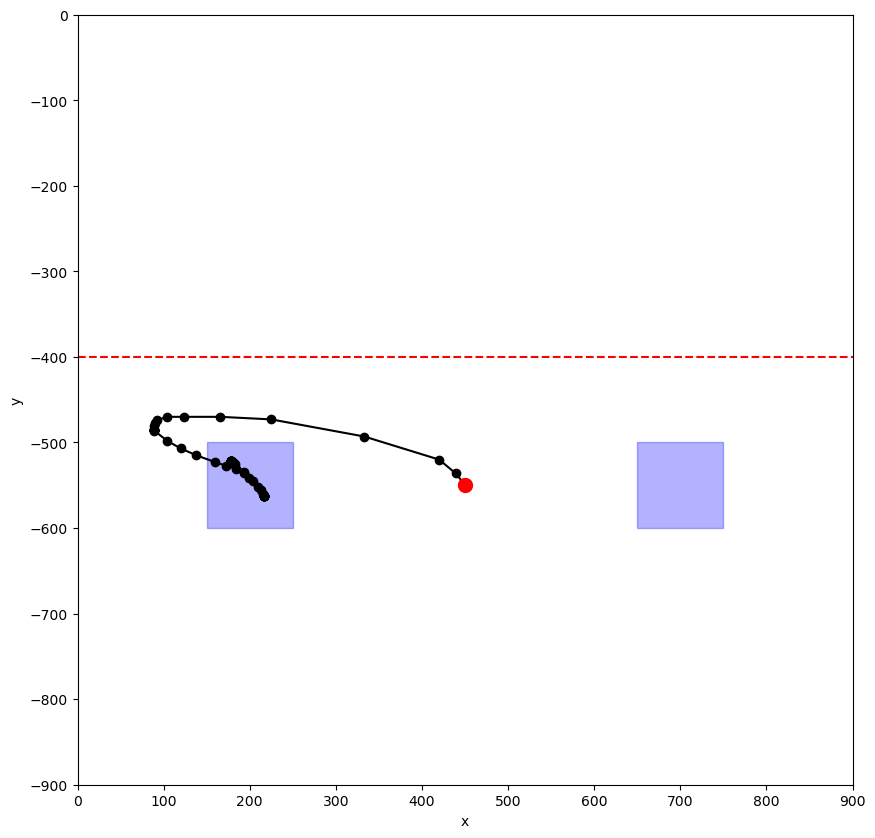

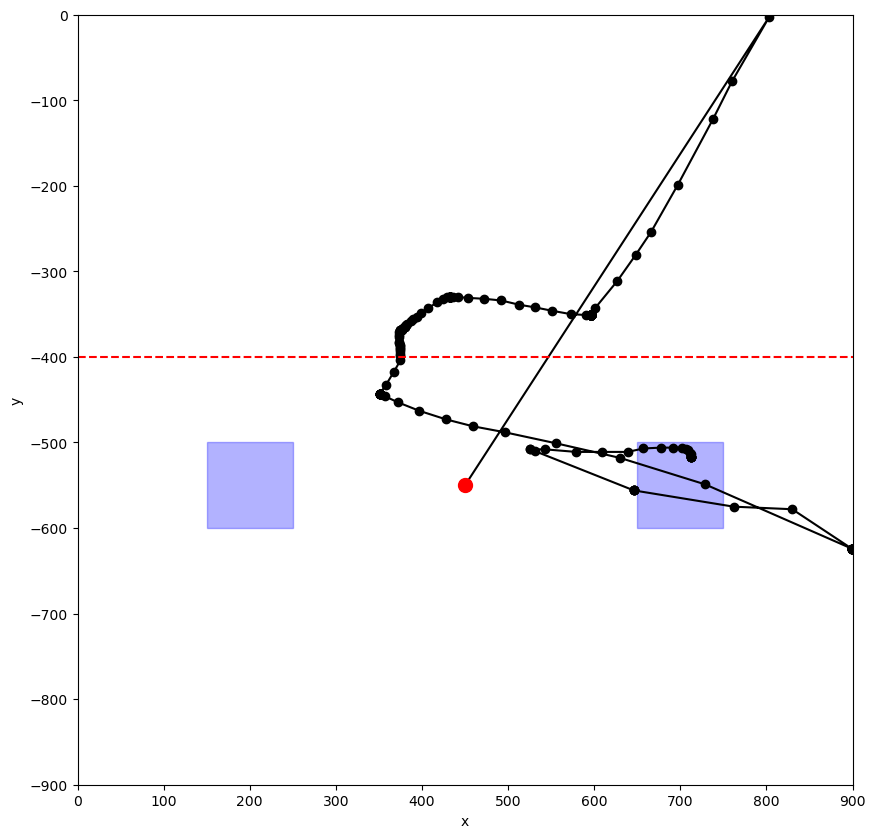

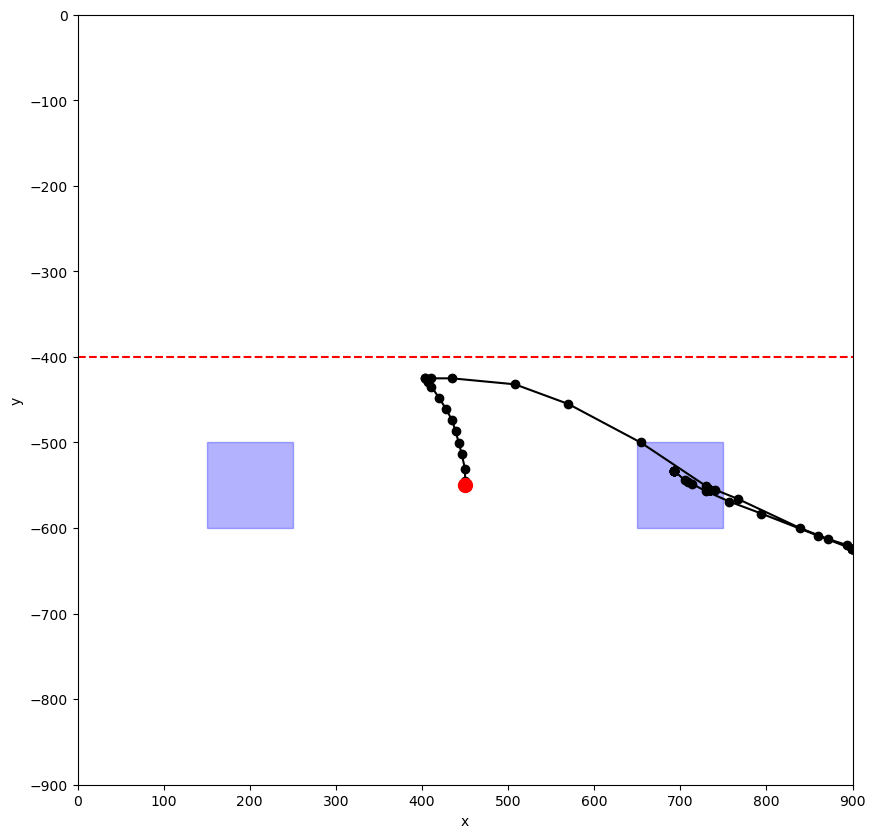

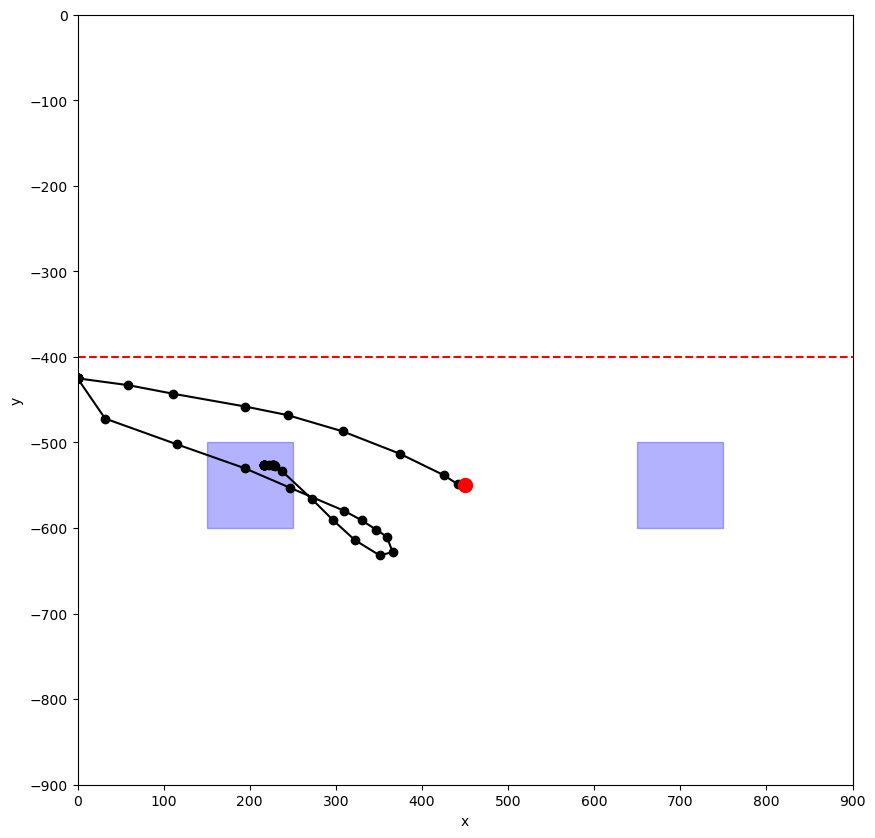

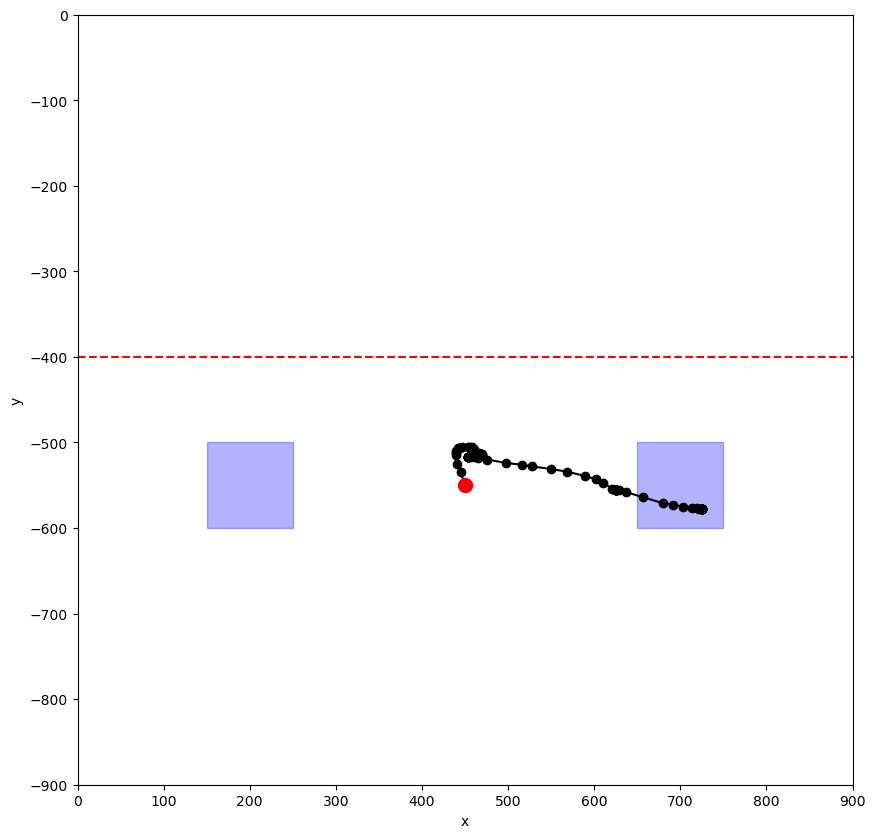

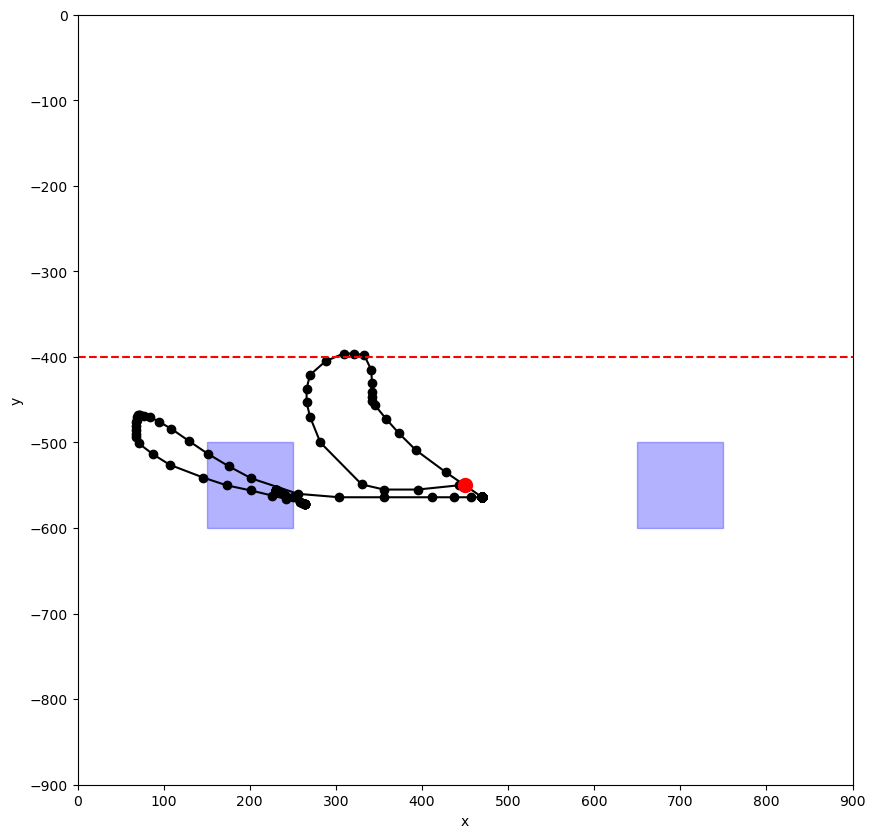

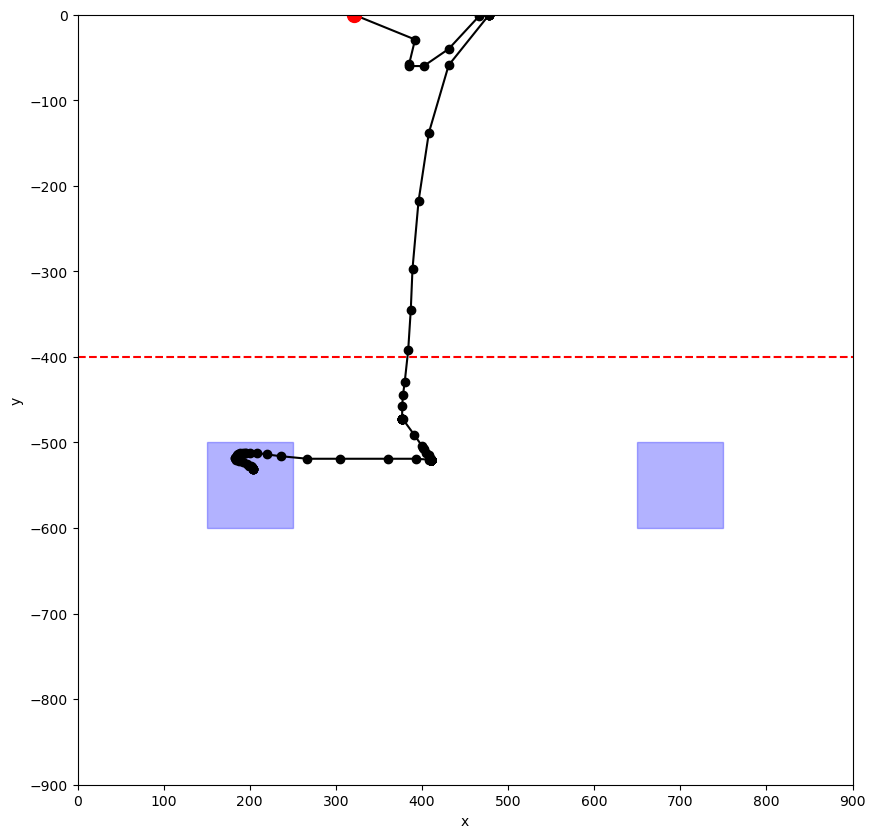

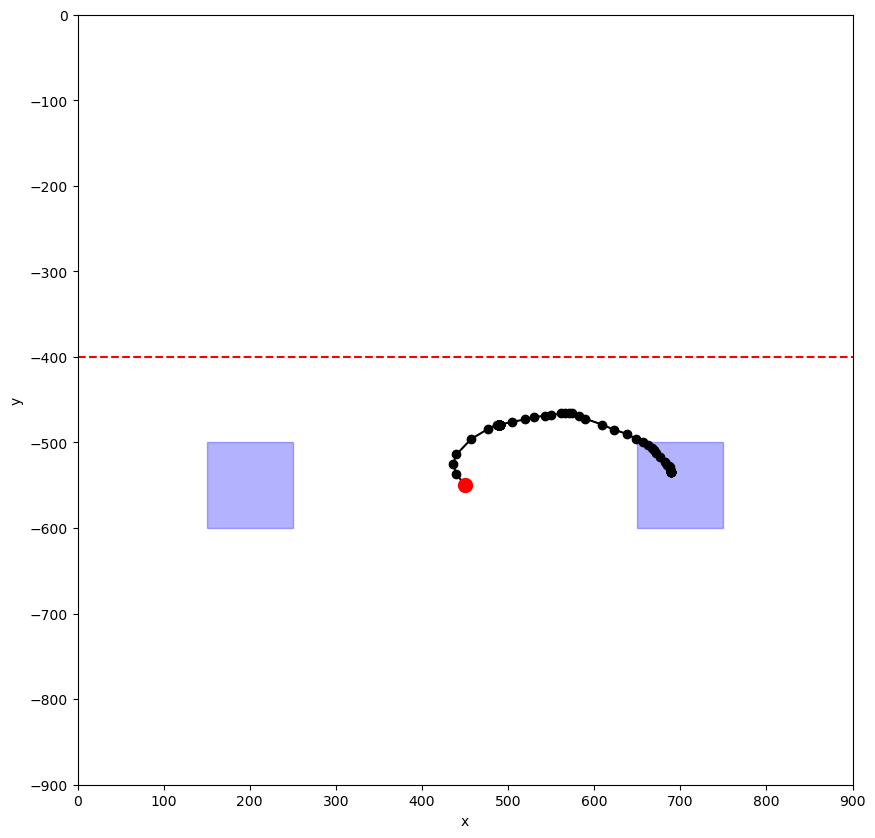

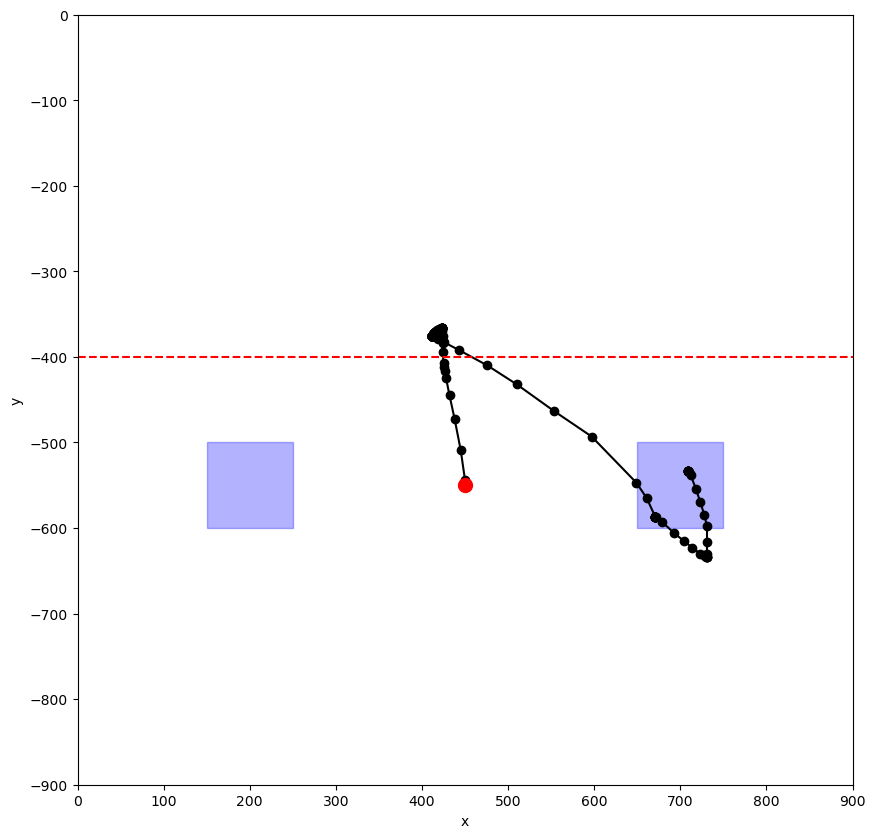

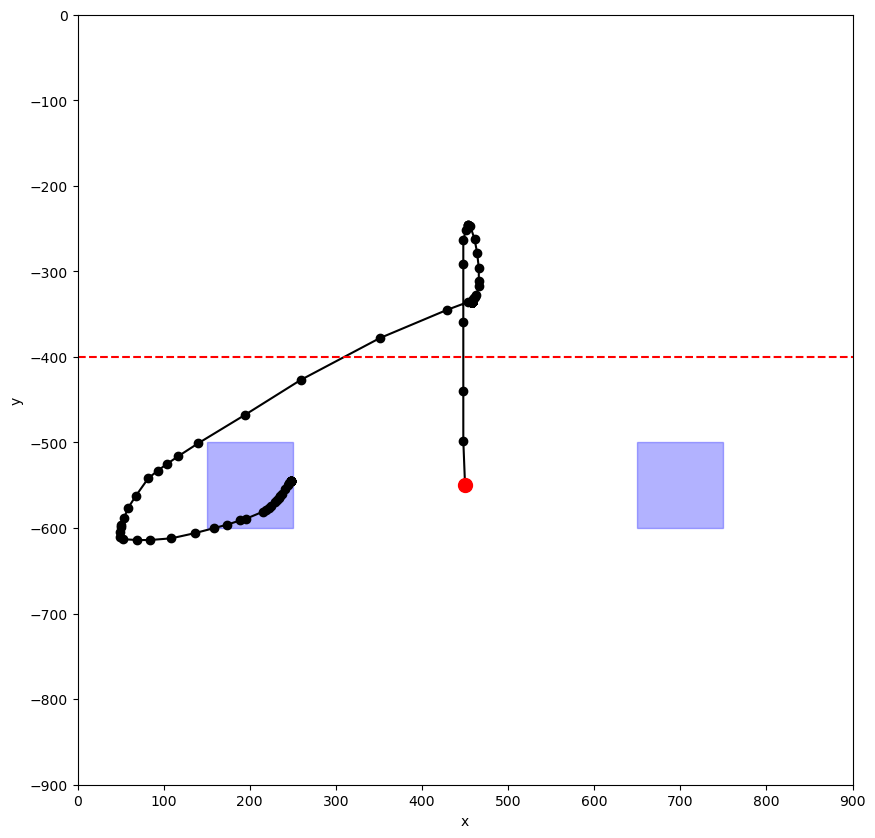

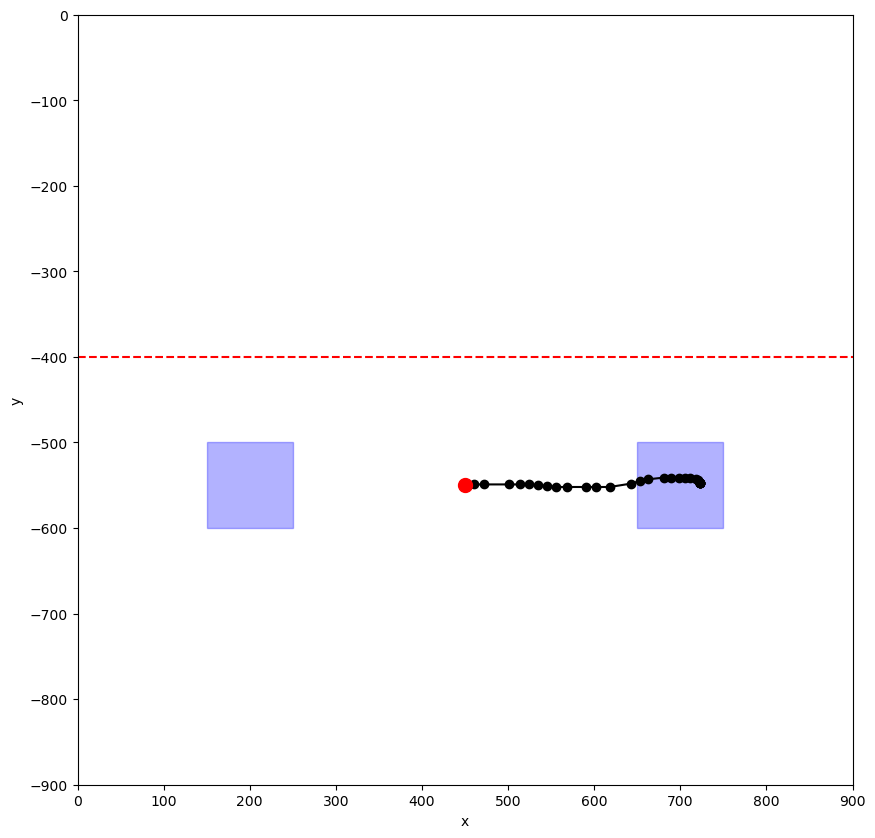

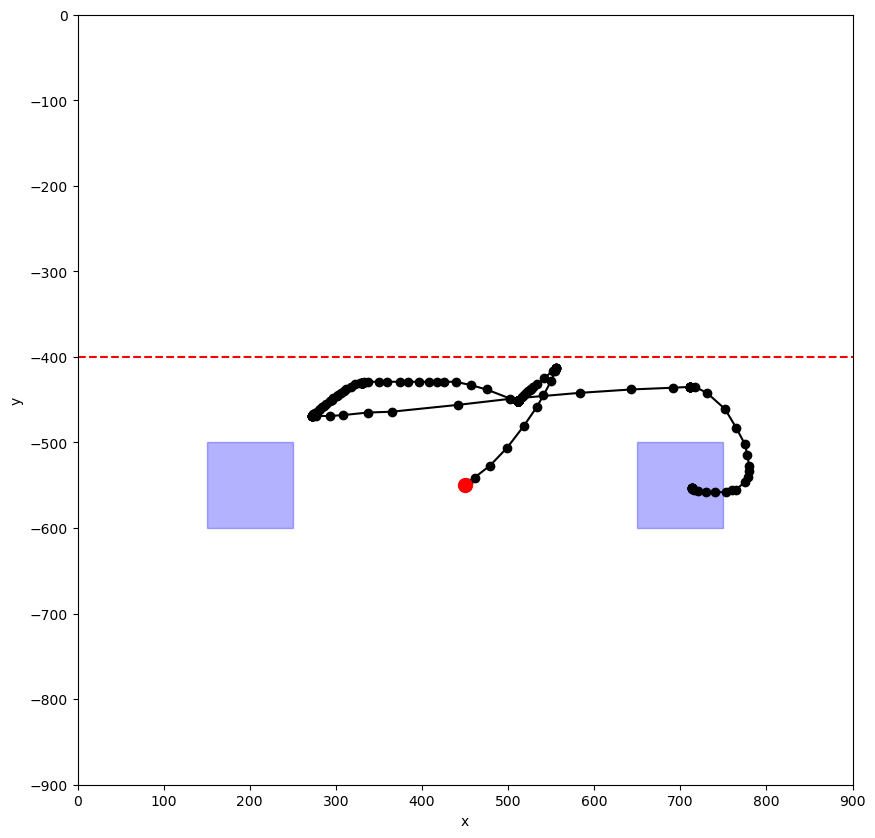

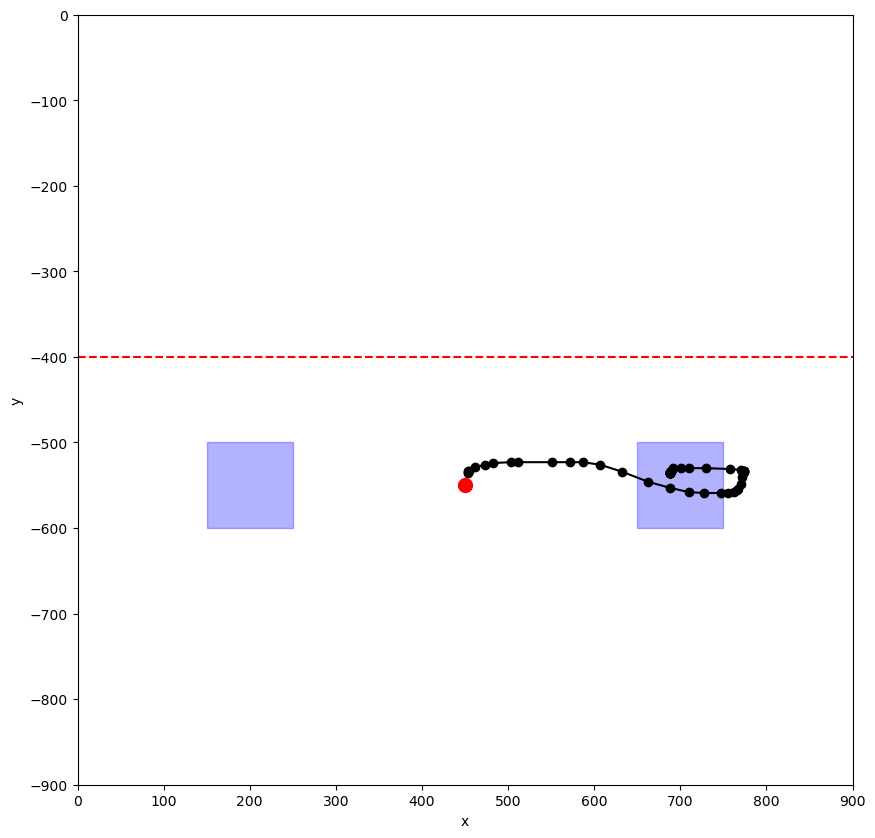

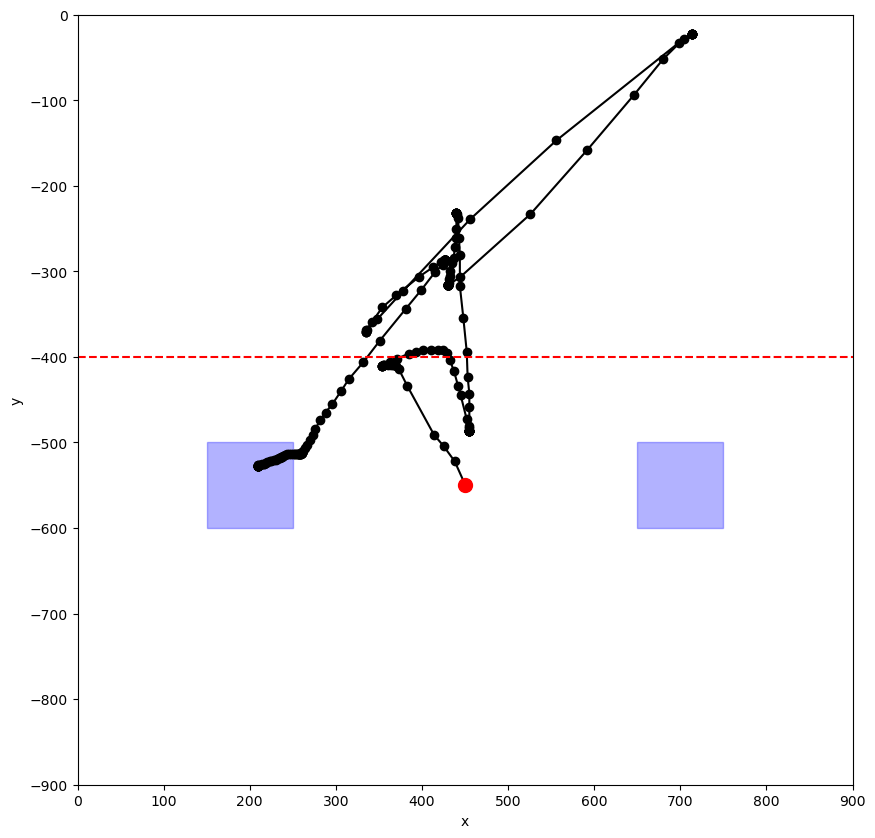

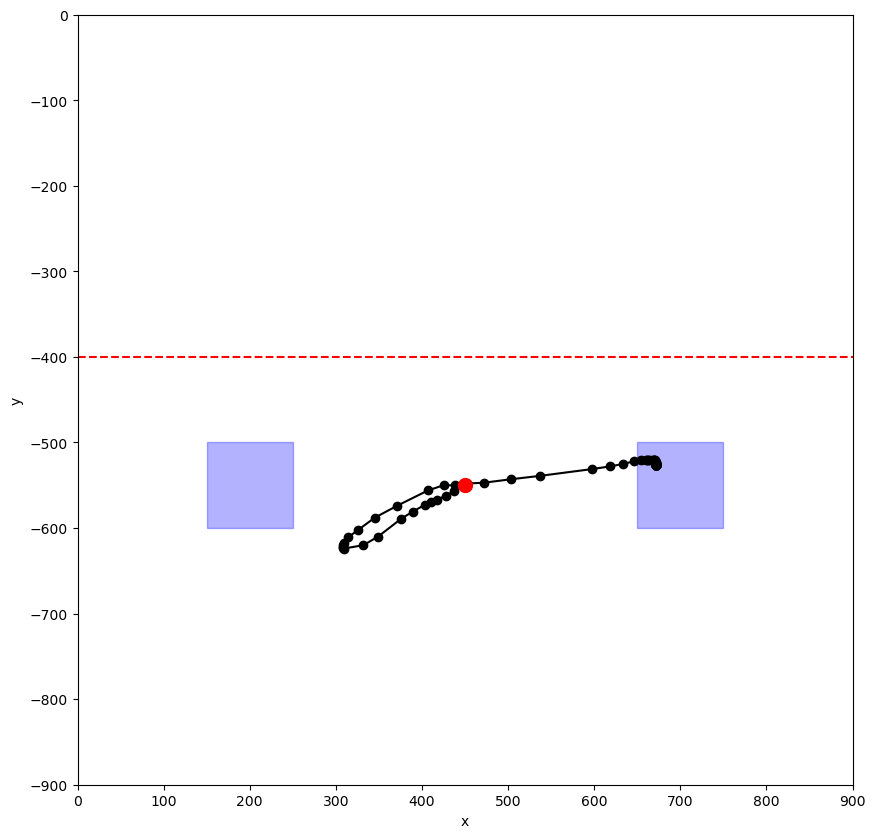

In [5]:
# Plot the mouse movements
for i in range(1, mouse_movements['question_num'].nunique() + 1):
    plot_movements(mouse_movements[mouse_movements['question_num'] == i][['x','y']].to_numpy(), user_id, i)

In [6]:
# load the answers
answers = pd.read_csv(f'results/{user_id}/answers.csv')
answers.head(6)

,Unnamed: 0,question_num,question,is_conflict,opt_a,opt_b,chosen_answer,correct_answer,sureness,ans_time
0,0,1,\n In a study 1000 people were tested. Amon...,True,Alex is russian,Alex is ethiopian,Alex is russian,Alex is ethiopian,100,27.014061
1,1,2,\nIn a study 1000 people were tested. Among th...,True,Dominique is a woman,Dominique is a man,Dominique is a man,Dominique is a woman,80,50.430222
2,2,3,\n In a study 1000 people were tested. Amon...,False,Rivka is an atheist,Rivka is religious,Rivka is religious,Rivka is religious,75,15.212718
3,3,4,\n In a study 1000 people were tested. Amon...,True,Kim is a woman,Kim is a man,Kim is a woman,Kim is a woman,50,27.610286
4,4,5,\n In a study 1000 people were tested. Amon...,False,Nick has a high school diploma,Nick is a university student,Nick is a university student,Nick is a university student,80,29.302857
5,5,6,\n In a study 1000 people were tested. Amon...,True,Roni grew up in the city,Roni grew up in the country,Roni grew up in the city,Roni grew up in the city,50,19.504607


In [7]:
answers['is_correct'] = answers['chosen_answer'] == answers['correct_answer']
answers.head()
print(f'The accuracy is {answers["is_correct"].mean()*100:.2f}%')

The accuracy is 66.67%


In [8]:
# finding the average sureness of the correct answers vs incorrect answers
sureness_correct = answers[answers['is_correct']]['sureness'].mean()
sureness_incorrect = answers[~answers['is_correct']]['sureness'].mean()
print(f'The average sureness of the correct answers is {sureness_correct:.2f}')
print(f'The average sureness of the incorrect answers is {sureness_incorrect:.2f}')

The average sureness of the correct answers is 64.00
The average sureness of the incorrect answers is 76.00


In [9]:
# finding the average sureness of the conflict vs non-conflict questions
sureness_conflict = answers[answers['is_conflict']]['sureness'].mean()
sureness_non_conflict = answers[~answers['is_conflict']]['sureness'].mean()
print(f'The average sureness of the conflict questions is {sureness_conflict:.2f}')
print(f'The average sureness of the non-conflict questions is {sureness_non_conflict:.2f}')

The average sureness of the conflict questions is 68.57
The average sureness of the non-conflict questions is 67.50


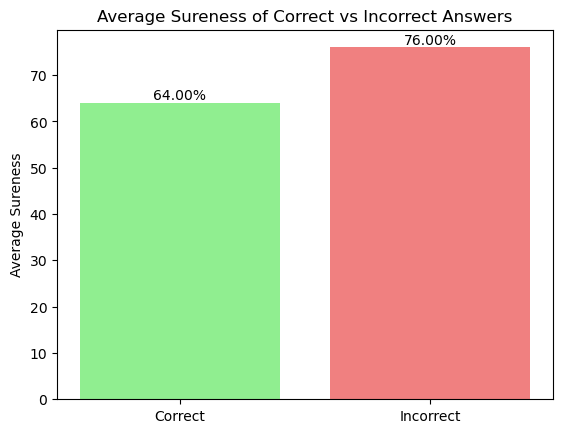

In [10]:
# making a plot of two bars showing the difference in sureness between the correct and incorrect answers
# correct is painted light green, while wrong with light red
fig, ax = plt.subplots()
ax.bar(['Correct', 'Incorrect'], [sureness_correct, sureness_incorrect], color=['lightgreen', 'lightcoral'])
# printing the sureness values on top of the bars
for i, v in enumerate([sureness_correct, sureness_incorrect]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Correct vs Incorrect Answers')
plt.show()

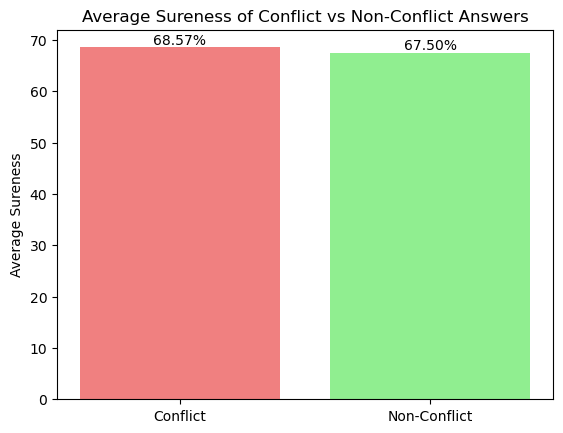

In [11]:
# making a plot of two bars showing the difference in sureness between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [sureness_conflict, sureness_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([sureness_conflict, sureness_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Conflict vs Non-Conflict Answers')
plt.show()

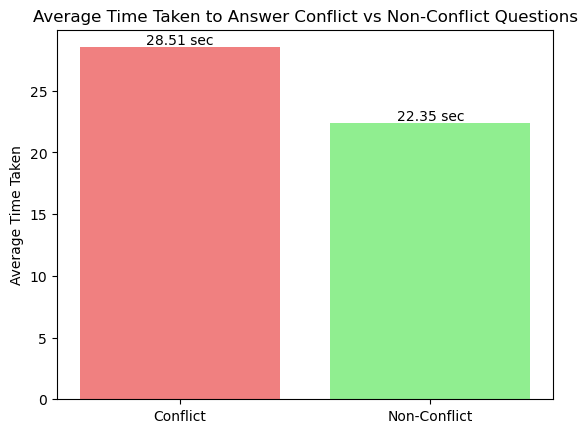

In [12]:
# making a plot of two bars showing the difference in time taken to answer between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [answers[answers['is_conflict']]['ans_time'].mean(), answers[~answers['is_conflict']]['ans_time'].mean()], color=['lightcoral', 'lightgreen'])
# printing the time taken values on top of the bars
for i, v in enumerate([answers[answers['is_conflict']]['ans_time'].mean(), answers[~answers['is_conflict']]['ans_time'].mean()]):
    ax.text(i, v + 0.01, f'{v:.2f} sec', ha='center', va='bottom')
ax.set_ylabel('Average Time Taken')
ax.set_title('Average Time Taken to Answer Conflict vs Non-Conflict Questions')
plt.show()

In [13]:
# Changing the mouse-movements dataframe to include column with distance to the answer chosen and the answer which was not chosen
answers['button_clicked'] = answers[['opt_a', 'opt_b','chosen_answer']].apply(lambda x: 'A' if x.iloc[0] == x.iloc[2] else 'B' if x.iloc[1] == x.iloc[2] else None, axis=1)
answers.head()

,Unnamed: 0,question_num,question,is_conflict,opt_a,opt_b,chosen_answer,correct_answer,sureness,ans_time,is_correct,button_clicked
0,0,1,\n In a study 1000 people were tested. Amon...,True,Alex is russian,Alex is ethiopian,Alex is russian,Alex is ethiopian,100,27.014061,False,A
1,1,2,\nIn a study 1000 people were tested. Among th...,True,Dominique is a woman,Dominique is a man,Dominique is a man,Dominique is a woman,80,50.430222,False,B
2,2,3,\n In a study 1000 people were tested. Amon...,False,Rivka is an atheist,Rivka is religious,Rivka is religious,Rivka is religious,75,15.212718,True,B
3,3,4,\n In a study 1000 people were tested. Amon...,True,Kim is a woman,Kim is a man,Kim is a woman,Kim is a woman,50,27.610286,True,A
4,4,5,\n In a study 1000 people were tested. Amon...,False,Nick has a high school diploma,Nick is a university student,Nick is a university student,Nick is a university student,80,29.302857,True,B


In [14]:
mouse_movements = mouse_movements.merge(answers[['question_num', 'button_clicked', 'is_conflict', 'is_correct']], on='question_num')
mouse_movements.head()

,Unnamed: 0,question_num,x,y,dist_to_ans_a,dist_to_ans_b,button_clicked,is_conflict,is_correct
0,0,1,450,550,304.138127,206.155281,A,True,False
1,1,1,450,550,304.138127,206.155281,A,True,False
2,2,1,450,550,304.138127,206.155281,A,True,False
3,3,1,450,550,304.138127,206.155281,A,True,False
4,4,1,450,550,304.138127,206.155281,A,True,False


In [15]:
mouse_movements['distance_to_chosen'] = mouse_movements[['dist_to_ans_a', 'dist_to_ans_b', 'button_clicked']].apply(lambda x: x.iloc[0] if x.iloc[2] == 'A' else x.iloc[1] if x.iloc[2] == 'B' else None, axis=1)
mouse_movements['distance_to_not_chosen'] = mouse_movements[['dist_to_ans_a', 'dist_to_ans_b', 'button_clicked']].apply(lambda x: x.iloc[0] if x.iloc[2] == 'B' else x.iloc[1] if x.iloc[2] == 'A' else None, axis=1)
mouse_movements.head()

,Unnamed: 0,question_num,x,y,dist_to_ans_a,dist_to_ans_b,button_clicked,is_conflict,is_correct,distance_to_chosen,distance_to_not_chosen
0,0,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281
1,1,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281
2,2,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281
3,3,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281
4,4,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281


In [16]:
# show the maximal and minimal y values for each question
for i in range(1, mouse_movements['question_num'].nunique() + 1):
    print(f'Question {i}: Maximal y value is {mouse_movements[mouse_movements["question_num"] == i]["y"].max()} and Minimal y value is {mouse_movements[mouse_movements["question_num"] == i]["y"].min()}')

Question 1: Maximal y value is 562 and Minimal y value is 470
Question 2: Maximal y value is 624 and Minimal y value is 3
Question 3: Maximal y value is 624 and Minimal y value is 425
Question 4: Maximal y value is 632 and Minimal y value is 425
Question 5: Maximal y value is 578 and Minimal y value is 505
Question 6: Maximal y value is 572 and Minimal y value is 396
Question 7: Maximal y value is 531 and Minimal y value is 0
Question 8: Maximal y value is 550 and Minimal y value is 466
Question 9: Maximal y value is 634 and Minimal y value is 366
Question 10: Maximal y value is 614 and Minimal y value is 246
Question 11: Maximal y value is 552 and Minimal y value is 541
Question 12: Maximal y value is 558 and Minimal y value is 413
Question 13: Maximal y value is 559 and Minimal y value is 523
Question 14: Maximal y value is 550 and Minimal y value is 22
Question 15: Maximal y value is 624 and Minimal y value is 520


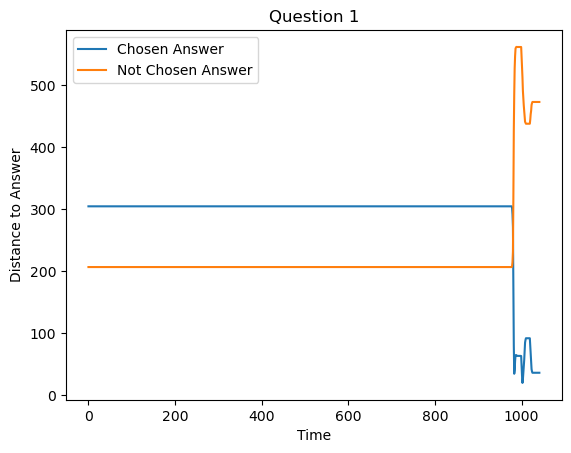

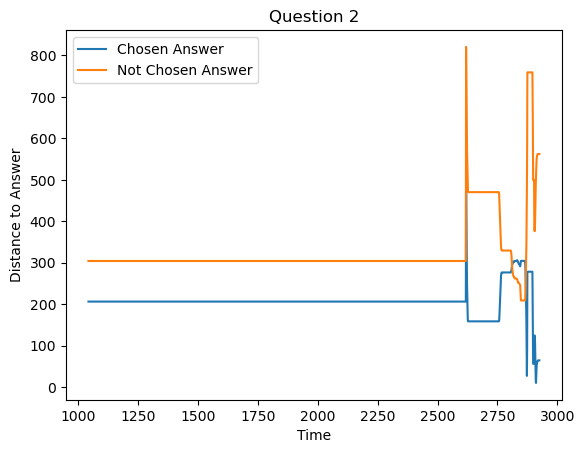

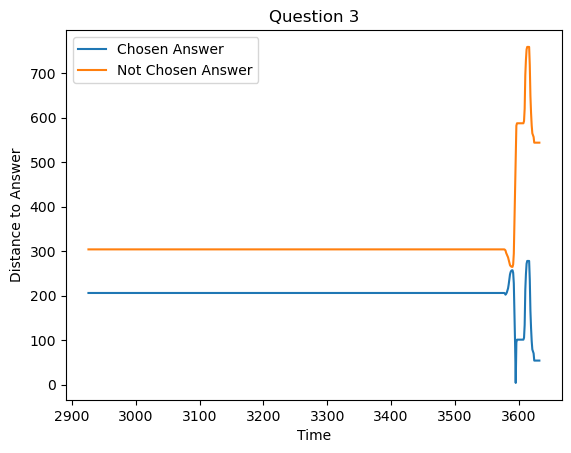

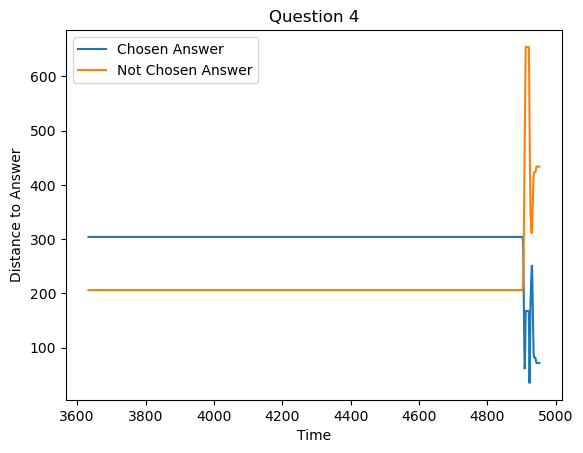

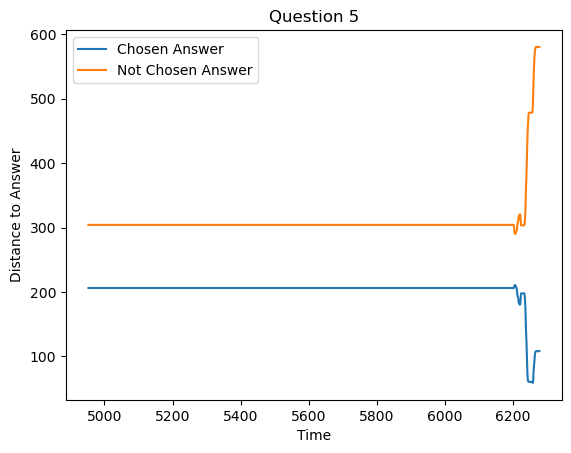

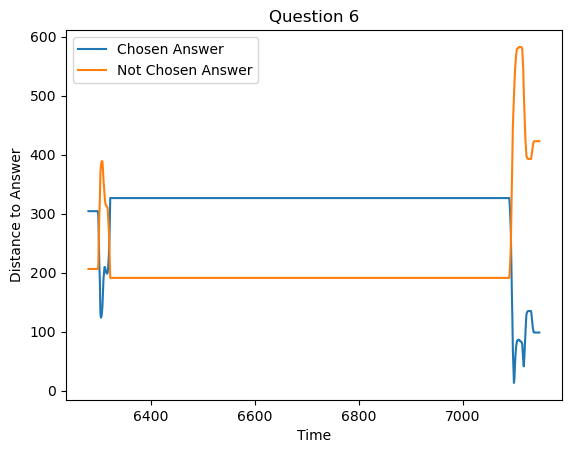

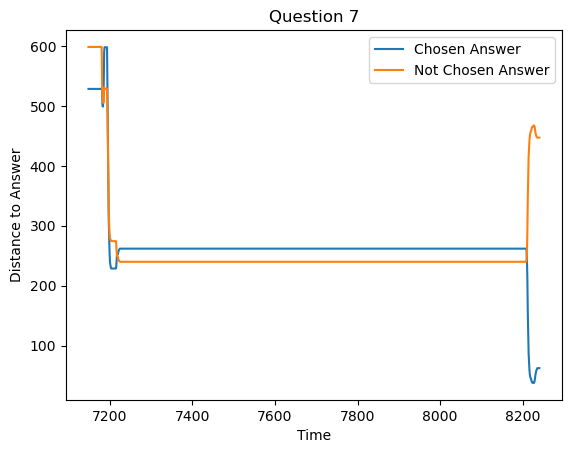

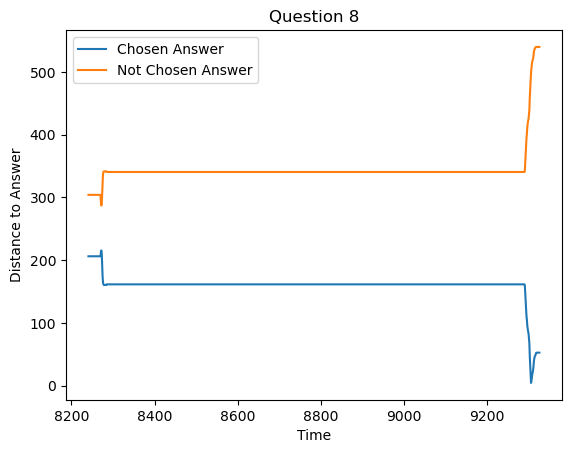

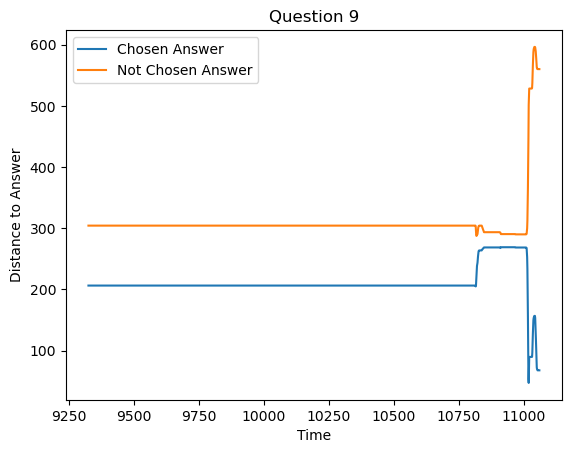

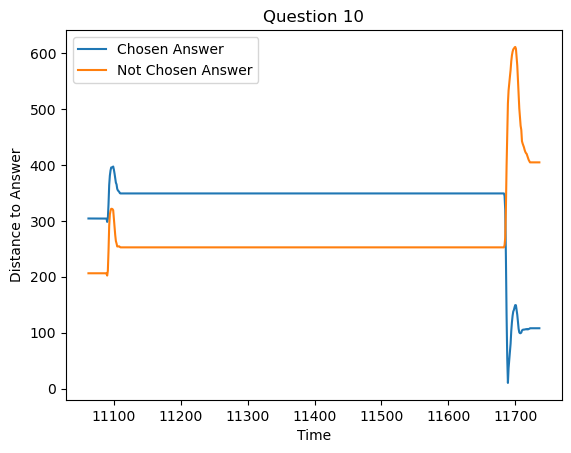

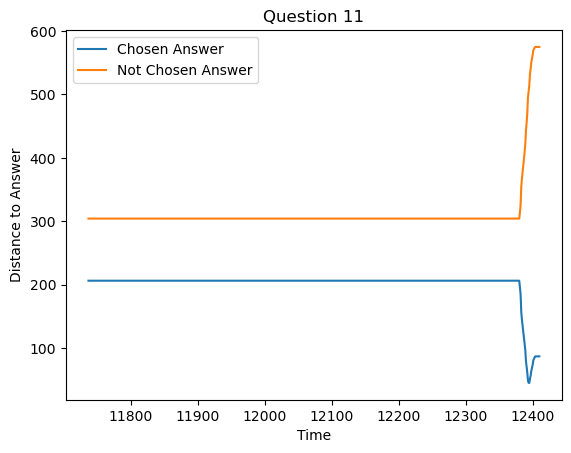

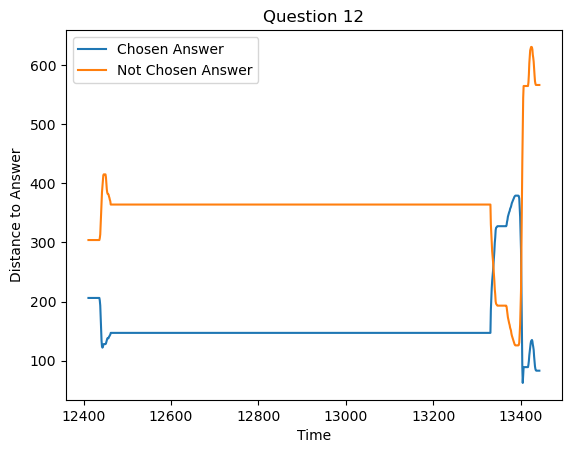

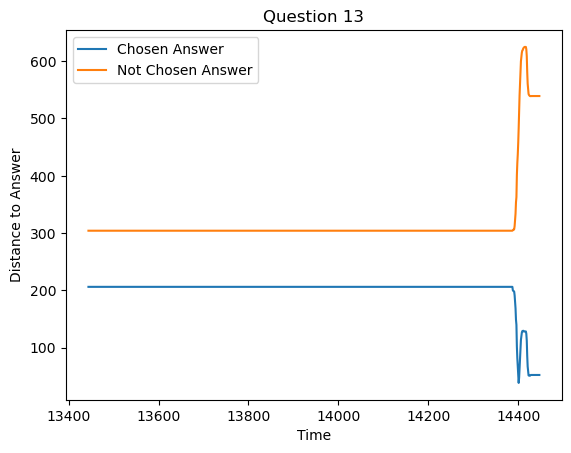

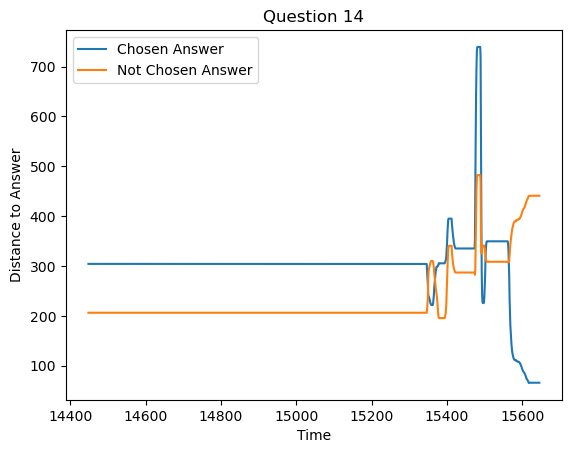

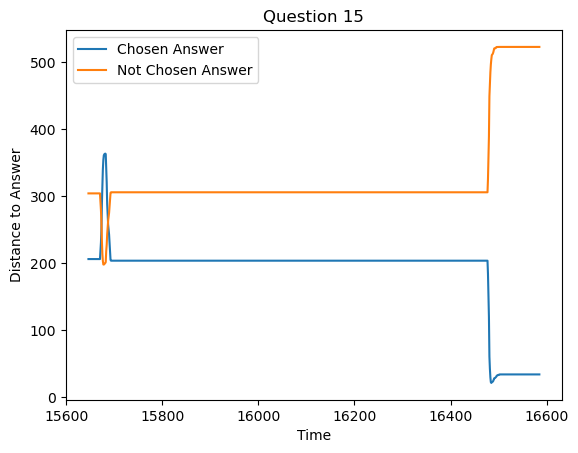

In [17]:
# For each question, plot the distance to the chosen answer vs the distance to the not chosen answer
for i in range(1, mouse_movements['question_num'].nunique() + 1):
    plt.plot(mouse_movements[mouse_movements['question_num'] == i]['distance_to_chosen'], label='Chosen Answer')
    plt.plot(mouse_movements[mouse_movements['question_num'] == i]['distance_to_not_chosen'], label='Not Chosen Answer')
    plt.xlabel('Time')
    plt.ylabel('Distance to Answer')
    plt.title(f'Question {i}')
    plt.legend()
    plt.show()

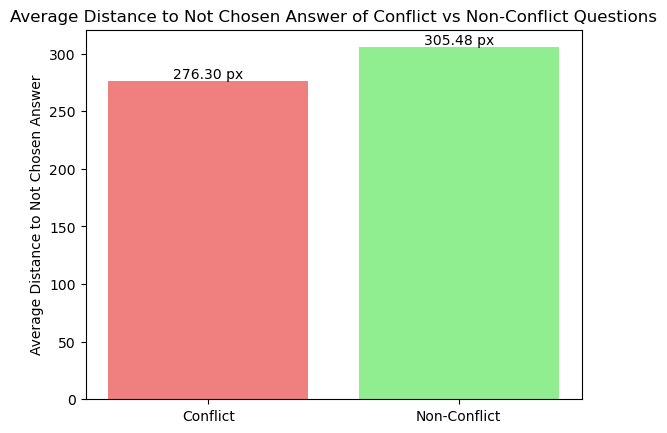

In [18]:
# Show the average distance to the not chosen answer as a function of conflict
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [mouse_movements[mouse_movements['is_conflict']]['distance_to_not_chosen'].mean(), mouse_movements[~mouse_movements['is_conflict']]['distance_to_not_chosen'].mean()], color=['lightcoral', 'lightgreen'])
# printing the distance values on top of the bars
for i, v in enumerate([mouse_movements[mouse_movements['is_conflict']]['distance_to_not_chosen'].mean(), mouse_movements[~mouse_movements['is_conflict']]['distance_to_not_chosen'].mean()]):
    ax.text(i, v + 0.01, f'{v:.2f} px', ha='center', va='bottom')
ax.set_ylabel('Average Distance to Not Chosen Answer')
ax.set_title('Average Distance to Not Chosen Answer of Conflict vs Non-Conflict Questions')
plt.show()

# Analyzing the results of the Arial group

In [19]:
# Analyzing overall results for all users
arial_group_names = ['andrey','danya','egor','sonya','valentin',
                     '308387497', '311385041', '204165450', '207072422', '312463391']

In [20]:
arial_demographics = [['male', 31, 'works in IT', 'IE'], ['male', 29, 'works in IT', 'IE'],
                      ['male', 31, 'works in IT', 'E'], ['female', 28, 'works in IT', 'IE'],
                      ['female', 31, 'dog trainer'], ['male', 21, 'student', 'CE'],
                      ['male', 21, 'student', 'CS'], ['male', 22, 'student', 'CS'],
                      ['female', 20, 'student', 'DS'], ['male', 22, 'student', 'Ph']]

In [21]:
arial_group_demographics = pd.DataFrame(arial_demographics, columns=['gender', 'age', 'work', 'studies'])
arial_group_demographics['does_study'] = arial_group_demographics['studies'].notna()
arial_group_demographics.head()

,gender,age,work,studies,does_study
0,male,31,works in IT,IE,True
1,male,29,works in IT,IE,True
2,male,31,works in IT,E,True
3,female,28,works in IT,IE,True
4,female,31,dog trainer,None,False


In [22]:
print('The average age of the Arial group is {:.2f} with se {:.2f}'.format(arial_group_demographics['age'].mean(), np.sqrt(arial_group_demographics['age'].var() / len(arial_group_demographics))))
percentage_study = arial_group_demographics['does_study'].mean() * 100
print(f"The percentage of people who have a degree (or study) {percentage_study}%")

The average age of the Arial group is 25.60 with se 1.51
The percentage of people who have a degree (or study) 90.0%


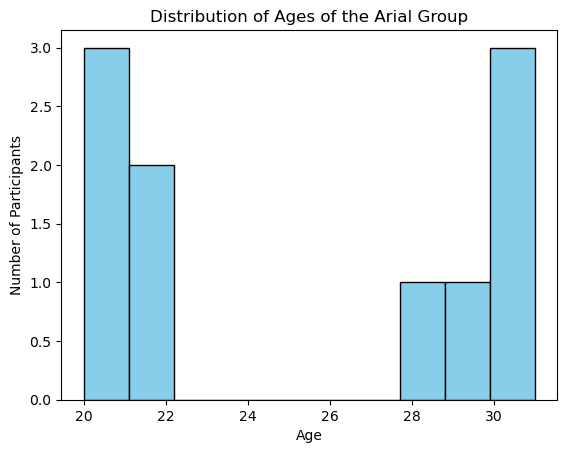

In [23]:
# Making a plot of the distribution of the ages of the Times New Roman group
fig, ax = plt.subplots()
ax.hist(arial_group_demographics['age'], bins=10, color='skyblue', edgecolor='black')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Participants')
ax.set_title('Distribution of Ages of the Arial Group')
plt.savefig('results/analysis/arial_age_distribution.png')

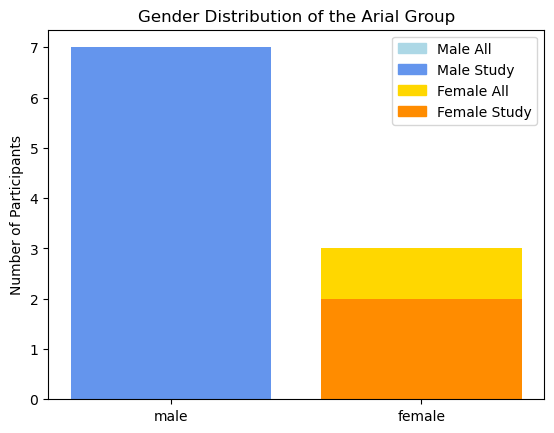

In [24]:
# Making a plot of the distribution of genders of the Times New Roman group
fig, ax = plt.subplots()
ax.bar(['male', 'female'], [len(arial_group_demographics[arial_group_demographics['gender'] == 'male']),
                            len(arial_group_demographics[arial_group_demographics['gender'] == 'female'])],
       color=['lightblue', 'gold'])
# adding bars to represent the amount of people who study out of male and female groups
ax.bar(['male', 'female'], [
    len(arial_group_demographics[(arial_group_demographics['gender'] == 'male') & (arial_group_demographics['does_study'])]),
    len(arial_group_demographics[
            (arial_group_demographics['gender'] == 'female') & (arial_group_demographics['does_study'])])],
       color=['cornflowerblue', 'darkorange'])

colors = {'Male All': 'lightblue', 'Male Study': 'cornflowerblue', 'Female All': 'gold', 'Female Study': 'darkorange'}
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
ax.set_ylabel('Number of Participants')
ax.set_title('Gender Distribution of the Arial Group')
plt.savefig('results/analysis/arial_gender_distribution.png')

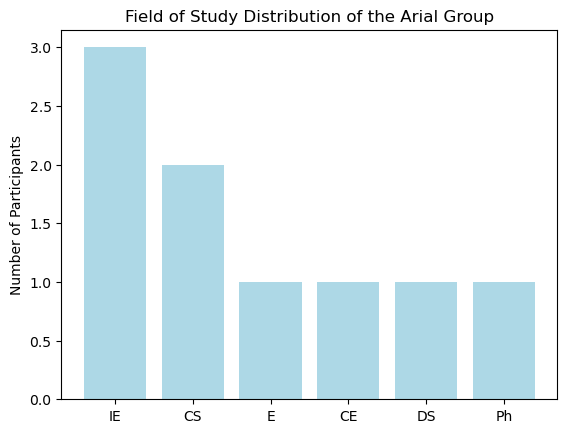

In [25]:
# Making a plot of the distribution of the fields of study of the Times New Roman group
fig, ax = plt.subplots()
ax.bar(arial_group_demographics['studies'].value_counts().index, arial_group_demographics['studies'].value_counts().values,
       color='lightblue')
ax.set_ylabel('Number of Participants')
ax.set_title('Field of Study Distribution of the Arial Group')
plt.savefig('results/analysis/arial_studies_distribution.png')

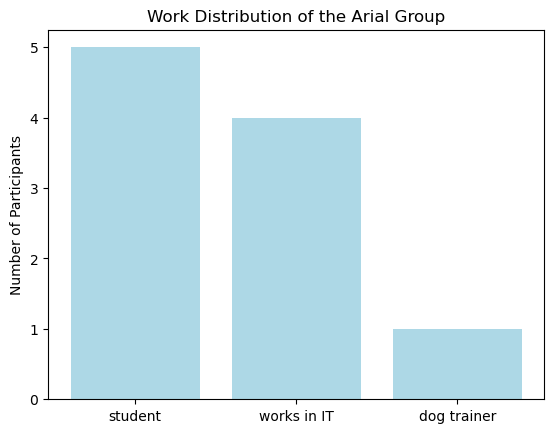

In [26]:
# Making a plot of the distribution of the work of the Times New Roman group
fig, ax = plt.subplots()
ax.bar(arial_group_demographics['work'].value_counts().index, arial_group_demographics['work'].value_counts().values, color='lightblue')
ax.set_ylabel('Number of Participants')
ax.set_title('Work Distribution of the Arial Group')
plt.savefig('results/analysis/arial_work_distribution.png')

In [27]:
# Load the data
arial_mouse_movements_array = []
arial_answers_array = []
arial_first_answers_array = []
for user_id in arial_group_names:
    # importing mouse movements
    user_mouse_movements = pd.read_csv(f'results/{user_id}/mouse_movements.csv')
    user_mouse_movements = user_mouse_movements.rename(columns={'question': 'question_num'})
    
    # importing answers
    user_answers = pd.read_csv(f'results/{user_id}/answers.csv')
    user_answers['is_correct'] = user_answers['chosen_answer'] == user_answers['correct_answer']
    user_answers['button_clicked'] = user_answers[['opt_a', 'opt_b','chosen_answer']].apply(lambda x: 'A' if x.iloc[0] == x.iloc[2] else 'B' if x.iloc[1] == x.iloc[2] else None, axis=1)
    arial_first_answers_array.append(user_answers[user_answers['question_num'] == 1])
    
    # merging the two dataframes
    user_mouse_movements = user_mouse_movements.merge(user_answers[['question_num', 'button_clicked', 'is_conflict', 'is_correct']], on='question_num')
    user_mouse_movements['distance_to_chosen'] = user_mouse_movements[['dist_to_ans_a', 'dist_to_ans_b', 'button_clicked']].apply(lambda x: x.iloc[0] if x.iloc[2] == 'A' else x.iloc[1] if x.iloc[2] == 'B' else None, axis=1)
    user_mouse_movements['distance_to_not_chosen'] = user_mouse_movements[['dist_to_ans_a', 'dist_to_ans_b', 'button_clicked']].apply(lambda x: x.iloc[0] if x.iloc[2] == 'B' else x.iloc[1] if x.iloc[2] == 'A' else None, axis=1)
    user_mouse_movements['in_decision_area']=user_mouse_movements['y'].apply(lambda x: 400 < x)
    
    arial_mouse_movements_array.append(user_mouse_movements)
    arial_answers_array.append(user_answers)

In [28]:
arial_mouse_movements_all = pd.concat(arial_mouse_movements_array)
arial_mouse_movements_all.head()

,Unnamed: 0,question_num,x,y,dist_to_ans_a,dist_to_ans_b,button_clicked,is_conflict,is_correct,distance_to_chosen,distance_to_not_chosen,in_decision_area
0,0,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281,True
1,1,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281,True
2,2,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281,True
3,3,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281,True
4,4,1,450,550,304.138127,206.155281,A,True,False,304.138127,206.155281,True


In [29]:
arial_answers_all = pd.concat(arial_answers_array)
arial_answers_all.head()

,Unnamed: 0,question_num,question,is_conflict,opt_a,opt_b,chosen_answer,correct_answer,sureness,ans_time,is_correct,button_clicked
0,0,1,\n In a study 1000 people were tested. Amon...,True,Roni grew up in the country,Roni grew up in the city,Roni grew up in the country,Roni grew up in the city,63,40.140253,False,A
1,1,2,\nIn a study 1000 people were tested. Among th...,True,Etienne drives a BMW,Etienne drives a used Nissan,Etienne drives a BMW,Etienne drives a BMW,50,69.065646,True,A
2,2,3,\n In a study 1000 people were tested. Amon...,True,Tom has a low-paying job,Tom has a high-paying job,Tom has a low-paying job,Tom has a low-paying job,70,17.855382,True,A
3,3,4,\n In a study 1000 people were tested. Amon...,False,Nick has a high school diploma,Nick is a university student,Nick has a high school diploma,Nick is a university student,67,45.244146,False,A
4,4,5,\n In a study 1000 people were tested. Amon...,True,Rivka is an atheist,Rivka is religious,Rivka is an atheist,Rivka is an atheist,76,72.416909,True,A


In [30]:
arial_first_answers_all = pd.concat(arial_first_answers_array)
arial_first_answers_all.head()

,Unnamed: 0,question_num,question,is_conflict,opt_a,opt_b,chosen_answer,correct_answer,sureness,ans_time,is_correct,button_clicked
0,0,1,\n In a study 1000 people were tested. Amon...,True,Roni grew up in the country,Roni grew up in the city,Roni grew up in the country,Roni grew up in the city,63,40.140253,False,A
0,0,1,\n In a study 1000 people were tested. Amon...,False,Nick is a university student,Nick has a high school diploma,Nick is a university student,Nick is a university student,50,42.365258,True,A
0,0,1,\n In a study 1000 people were tested. Amon...,True,Tom has a high-paying job,Tom has a low-paying job,Tom has a low-paying job,Tom has a low-paying job,98,41.004245,True,B
0,0,1,\n In a study 1000 people were tested. Amon...,True,John is a combat fighter,John is an office worker,John is a combat fighter,John is an office worker,92,19.423141,False,A
0,0,1,\n In a study 1000 people were tested. Amon...,True,Alex is russian,Alex is ethiopian,Alex is russian,Alex is ethiopian,100,27.014061,False,A


## Accuracy

In [31]:
# finding the average accuracy of the Arial group as a whole
arial_accuracy = arial_answers_all['is_correct'].mean() * 100
arial_accuracy_se = np.sqrt(arial_answers_all['is_correct'].var() / len(arial_answers_all)) *100
print(f'The accuracy of the Arial group is {arial_accuracy:.2f} questions with se {arial_accuracy_se:.2f}')

# finding the average accuracy of the Arial group on conflict vs non-conflict questions as a whole and se
arial_accuracy_conflict = arial_answers_all[arial_answers_all['is_conflict']]['is_correct'].mean() * 100
arial_accuracy_conflict_se = np.sqrt(arial_answers_all[arial_answers_all['is_conflict']]['is_correct'].var() / len(arial_answers_all[arial_answers_all['is_conflict']])) * 100
arial_accuracy_non_conflict = arial_answers_all[~arial_answers_all['is_conflict']]['is_correct'].mean() * 100
arial_accuracy_non_conflict_se = np.sqrt(arial_answers_all[~arial_answers_all['is_conflict']]['is_correct'].var() / len(arial_answers_all[~arial_answers_all['is_conflict']])) * 100
print(f'The accuracy of the Arial group on conflict questions is {arial_accuracy_conflict:.2f} questions with se {arial_accuracy_conflict_se:.2f}')
print(f'The accuracy of the Arial group on non-conflict questions is {arial_accuracy_non_conflict:.2f} questions with se {arial_accuracy_non_conflict_se:.2f}')

The accuracy of the Arial group is 69.33 questions with se 3.78
The accuracy of the Arial group on conflict questions is 47.14 questions with se 6.01
The accuracy of the Arial group on non-conflict questions is 88.75 questions with se 3.56


In [32]:
# finding the average sureness of the correct answers vs incorrect answers
arial_sureness_correct = arial_answers_all[arial_answers_all['is_correct']]['sureness'].mean()
arial_se_sureness_correct = np.sqrt(arial_answers_all[arial_answers_all['is_correct']]['sureness'].var() / len(arial_answers_all[arial_answers_all['is_correct']]))
arial_sureness_incorrect = arial_answers_all[~arial_answers_all['is_correct']]['sureness'].mean()
arial_se_sureness_incorrect = np.sqrt(arial_answers_all[~arial_answers_all['is_correct']]['sureness'].var() / len(arial_answers_all[~arial_answers_all['is_correct']])
)
print(f'The average sureness of the correct answers is {arial_sureness_correct:.2f} with se {arial_se_sureness_correct:.2f}')
print(f'The average sureness of the incorrect answers is {arial_sureness_incorrect:.2f} with se {arial_se_sureness_incorrect:.2f}')

The average sureness of the correct answers is 84.45 with se 1.51
The average sureness of the incorrect answers is 73.28 with se 2.77


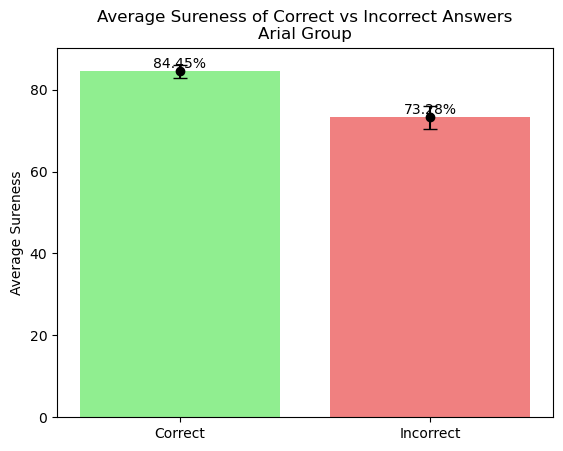

In [33]:
# making a plot of two bars showing the difference in sureness between the correct and incorrect answers
# correct is painted light green, while wrong with light red
# also showing standard deviation as error bars
fig, ax = plt.subplots()
ax.bar(['Correct', 'Incorrect'], [arial_sureness_correct, arial_sureness_incorrect], color=['lightgreen', 'lightcoral'])
# printing the sureness values on top of the bars
for i, v in enumerate([arial_sureness_correct, arial_sureness_incorrect]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Correct', 'Incorrect'], [arial_sureness_correct, arial_sureness_incorrect], yerr=[arial_se_sureness_correct, arial_se_sureness_incorrect], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Correct vs Incorrect Answers\nArial Group')
plt.savefig('results/analysis/arial_sureness_correct_incorrect.png')

In [34]:
# Using the F statistic to determine if the difference in sureness between the correct and incorrect answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_sureness_correct / arial_sureness_incorrect if arial_sureness_correct > arial_sureness_incorrect else arial_sureness_incorrect / arial_sureness_correct
# calculating the degrees of freedom
df1 = len(arial_answers_all[arial_answers_all['is_correct']]) - 1
df2 = len(arial_answers_all[~arial_answers_all['is_correct']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.15
The p-value is 0.60
The critical value is 1.55


## Response Confidence (Analysis 1)

In [35]:
# finding the average sureness of the conflict vs non-conflict questions
arial_sureness_conflict = arial_answers_all[arial_answers_all['is_conflict']]['sureness'].mean()
arial_se_sureness_conflict = np.sqrt(arial_answers_all[arial_answers_all['is_conflict']]['sureness'].var() / len(arial_answers_all[arial_answers_all['is_conflict']]))
arial_sureness_non_conflict = arial_answers_all[~arial_answers_all['is_conflict']]['sureness'].mean()
arial_se_sureness_non_conflict = np.sqrt(arial_answers_all[~arial_answers_all['is_conflict']]['sureness'].var() / len(arial_answers_all[~arial_answers_all['is_conflict']]))
print(f'The average sureness of the conflict questions is {arial_sureness_conflict:.2f} with se {arial_se_sureness_conflict:.2f}')
print(f'The average sureness of the non-conflict questions is {arial_sureness_non_conflict:.2f} with std {arial_se_sureness_non_conflict:.2f}')

The average sureness of the conflict questions is 79.49 with se 2.21
The average sureness of the non-conflict questions is 82.38 with std 1.79


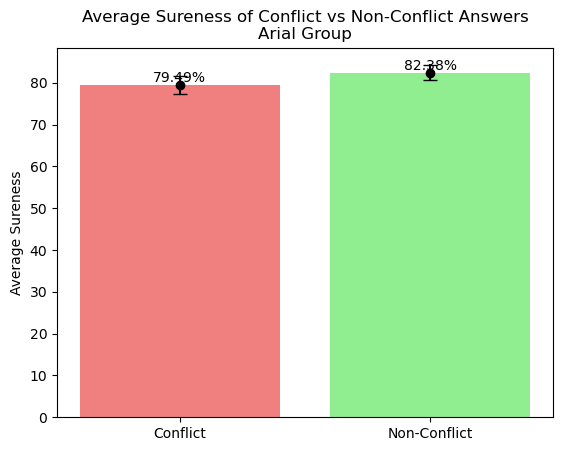

In [36]:
# making a plot of two bars showing the difference in sureness between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
# also showing standard deviation as error bars
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [arial_sureness_conflict, arial_sureness_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([arial_sureness_conflict, arial_sureness_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [arial_sureness_conflict, arial_sureness_non_conflict], yerr=[arial_se_sureness_conflict, arial_se_sureness_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Conflict vs Non-Conflict Answers\nArial Group')
plt.savefig('results/analysis/arial_sureness_conflict_non_conflict.png')

In [37]:
# Using the F statistic to determine if the difference in sureness between the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using
# calculating the F statistic
F = arial_sureness_conflict / arial_sureness_non_conflict if arial_sureness_conflict > arial_sureness_non_conflict else arial_sureness_non_conflict / arial_sureness_conflict
# calculating the degrees of freedom
df1 = len(arial_answers_all[arial_answers_all['is_conflict']]) - 1
df2 = len(arial_answers_all[~arial_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.04
The p-value is 0.87
The critical value is 1.47


## Analysis 2

In [38]:
# finding the average sureness of the incorrectly answered conflict vs all non-conflict questions
arial_sureness_incorrect_conflict = arial_answers_all[arial_answers_all['is_conflict'] & ~arial_answers_all['is_correct']]['sureness'].mean()
arial_se_sureness_incorrect_conflict = np.sqrt(arial_answers_all[arial_answers_all['is_conflict'] & ~arial_answers_all['is_correct']]['sureness'].var() / len(arial_answers_all[arial_answers_all['is_conflict'] & ~arial_answers_all['is_correct']]))
print(f'The average sureness of the incorrectly answered conflict questions is {arial_sureness_incorrect_conflict:.2f} with se {arial_se_sureness_incorrect_conflict:.2f}')

The average sureness of the incorrectly answered conflict questions is 73.76 with se 3.09


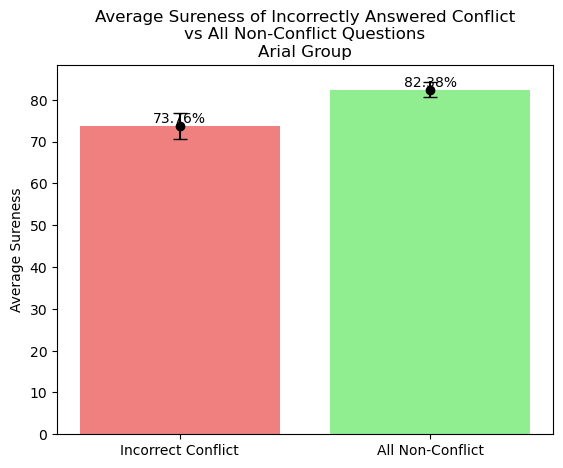

In [39]:
# plotting the sureness of the incorrectly answered conflict questions vs all non-conflict questions
fig, ax = plt.subplots()
ax.bar(['Incorrect Conflict', 'All Non-Conflict'], [arial_sureness_incorrect_conflict, arial_sureness_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([arial_sureness_incorrect_conflict, arial_sureness_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Incorrect Conflict', 'All Non-Conflict'], [arial_sureness_incorrect_conflict, arial_sureness_non_conflict], yerr=[arial_se_sureness_incorrect_conflict, arial_se_sureness_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Incorrectly Answered Conflict\nvs All Non-Conflict Questions\nArial Group')
plt.savefig('results/analysis/arial_sureness_incorrect_conflict_all_non_conflict.png')

In [40]:
# Using the F statistic to determine if the difference in sureness between the incorrectly answered conflict and all non-conflict questions is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_sureness_incorrect_conflict / arial_sureness_non_conflict if arial_sureness_incorrect_conflict > arial_sureness_non_conflict else arial_sureness_non_conflict / arial_sureness_incorrect_conflict
# calculating the degrees of freedom
df1 = len(arial_answers_all[arial_answers_all['is_conflict'] & ~arial_answers_all['is_correct']]) - 1
df2 = len(arial_answers_all[~arial_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.12
The p-value is 0.67
The critical value is 1.57


## Analysis 3

In [41]:
# finding the average sureness of all conflict questions vs non-conflict questions with only correct answers
arial_sureness_non_conflict_correct = arial_answers_all[~arial_answers_all['is_conflict'] & arial_answers_all['is_correct']]['sureness'].mean()
arial_se_sureness_non_conflict_correct = np.sqrt(arial_answers_all[~arial_answers_all['is_conflict'] & arial_answers_all['is_correct']]['sureness'].var() / len(arial_answers_all[~arial_answers_all['is_conflict'] & arial_answers_all['is_correct']]))
print(f'The average sureness of all non-conflict questions with correct answers is {arial_sureness_non_conflict_correct:.2f} with se {arial_se_sureness_non_conflict_correct:.2f}')             

The average sureness of all non-conflict questions with correct answers is 83.77 with se 1.80


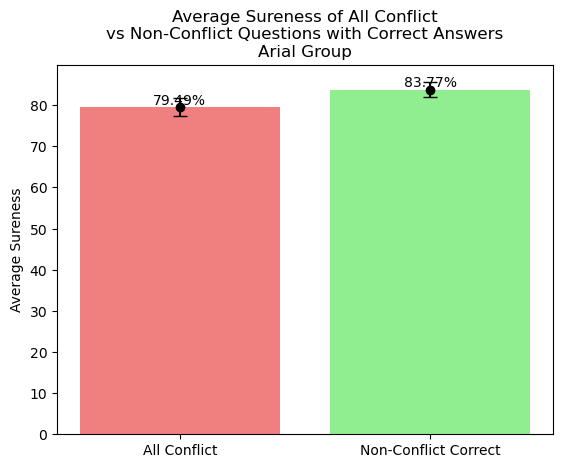

In [42]:
# plotting the sureness of all conflict questions vs non-conflict questions with only correct answers
fig, ax = plt.subplots()
ax.bar(['All Conflict', 'Non-Conflict Correct'], [arial_sureness_conflict, arial_sureness_non_conflict_correct], color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([arial_sureness_conflict, arial_sureness_non_conflict_correct]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['All Conflict', 'Non-Conflict Correct'], [arial_sureness_conflict, arial_sureness_non_conflict_correct], yerr=[arial_se_sureness_conflict, arial_se_sureness_non_conflict_correct], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of All Conflict\nvs Non-Conflict Questions with Correct Answers\nArial Group')
plt.savefig('results/analysis/arial_sureness_all_conflict_non_conflict_correct.png')

In [43]:
# Using the F statistic to determine if the difference in sureness between the all conflict and non-conflict questions with correct answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_sureness_conflict / arial_sureness_non_conflict_correct if arial_sureness_conflict > arial_sureness_non_conflict_correct else arial_sureness_non_conflict_correct / arial_sureness_conflict
# calculating the degrees of freedom
df1 = len(arial_answers_all[arial_answers_all['is_conflict']]) - 1
df2 = len(arial_answers_all[~arial_answers_all['is_conflict'] & arial_answers_all['is_correct']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.05
The p-value is 0.83
The critical value is 1.49


## First-answer Analysis (Analysis 4)

In [44]:
# finding the average sureness of the first answers of the Arial group in conflict vs non-conflict questions
arial_sureness_first_conflict = arial_first_answers_all[arial_first_answers_all['is_conflict']]['sureness'].mean()
arial_se_sureness_first_conflict = np.sqrt(arial_first_answers_all[arial_first_answers_all['is_conflict']]['sureness'].var() / len(arial_first_answers_all[arial_first_answers_all['is_conflict']]))
arial_sureness_first_non_conflict = arial_first_answers_all[~arial_first_answers_all['is_conflict']]['sureness'].mean()
arial_se_sureness_first_non_conflict = np.sqrt(arial_first_answers_all[~arial_first_answers_all['is_conflict']]['sureness'].var() / len(arial_first_answers_all[~arial_first_answers_all['is_conflict']]))
print(f'The average sureness of the first answers of the conflict questions is {arial_sureness_first_conflict:.2f} with se {arial_se_sureness_first_conflict:.2f}')
print(f'The average sureness of the first answers of the non-conflict questions is {arial_sureness_first_non_conflict:.2f} with se {arial_se_sureness_first_non_conflict:.2f}')

The average sureness of the first answers of the conflict questions is 88.60 with se 6.66
The average sureness of the first answers of the non-conflict questions is 87.00 with se 9.43


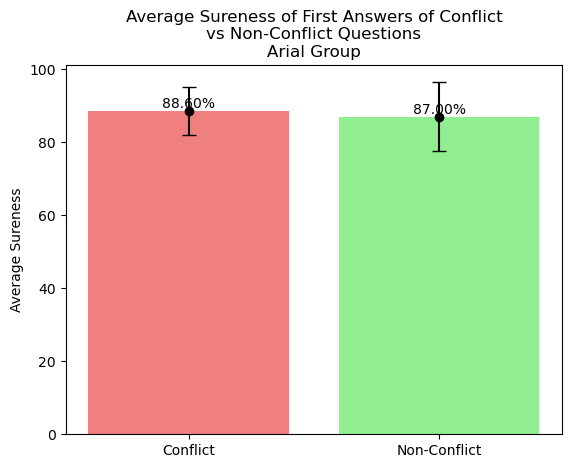

In [45]:
# making a plot of two bars showing the difference in sureness between the first answers of the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [arial_sureness_first_conflict, arial_sureness_first_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([arial_sureness_first_conflict, arial_sureness_first_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [arial_sureness_first_conflict, arial_sureness_first_non_conflict], yerr=[arial_se_sureness_first_conflict, arial_se_sureness_first_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of First Answers of Conflict\nvs Non-Conflict Questions\nArial Group')
plt.savefig('results/analysis/arial_sureness_first_conflict_non_conflict.png')

In [46]:
# Using the F statistic to determine if the difference in sureness between the first answers of the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_sureness_first_conflict / arial_sureness_first_non_conflict if arial_sureness_first_conflict > arial_sureness_first_non_conflict else arial_sureness_first_non_conflict / arial_sureness_first_conflict
# calculating the degrees of freedom
df1 = len(arial_first_answers_all[arial_first_answers_all['is_conflict']]) - 1
df2 = len(arial_first_answers_all[~arial_first_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.02
The p-value is 0.99
The critical value is 6.39


## Analysis 5

In [47]:
# finding the average sureness of the first answers of the Arial group in conflict correctly answered, conflict incorrectly answered and all non-conflict questions
arial_sureness_first_correct_conflict = arial_first_answers_all[arial_first_answers_all['is_conflict'] & arial_first_answers_all['is_correct']]['sureness'].mean()
arial_se_sureness_first_correct_conflict = np.sqrt(arial_first_answers_all[arial_first_answers_all['is_conflict'] & arial_first_answers_all['is_correct']]['sureness'].var() / len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & arial_first_answers_all['is_correct']]))
arial_sureness_first_incorrect_conflict = arial_first_answers_all[arial_first_answers_all['is_conflict'] & ~arial_first_answers_all['is_correct']]['sureness'].mean()
arial_se_sureness_first_incorrect_conflict = np.sqrt(arial_first_answers_all[arial_first_answers_all['is_conflict'] & ~arial_first_answers_all['is_correct']]['sureness'].var() / len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & ~arial_first_answers_all['is_correct']]))
print(f'The average sureness of the first answers of the correctly answered conflict questions is {arial_sureness_first_correct_conflict:.2f} with se {arial_se_sureness_first_correct_conflict:.2f}')
print(f'The average sureness of the first answers of the incorrectly answered conflict questions is {arial_sureness_first_incorrect_conflict:.2f} with se {arial_se_sureness_first_incorrect_conflict:.2f}')

The average sureness of the first answers of the correctly answered conflict questions is 94.00 with se 4.00
The average sureness of the first answers of the incorrectly answered conflict questions is 85.00 with se 11.24


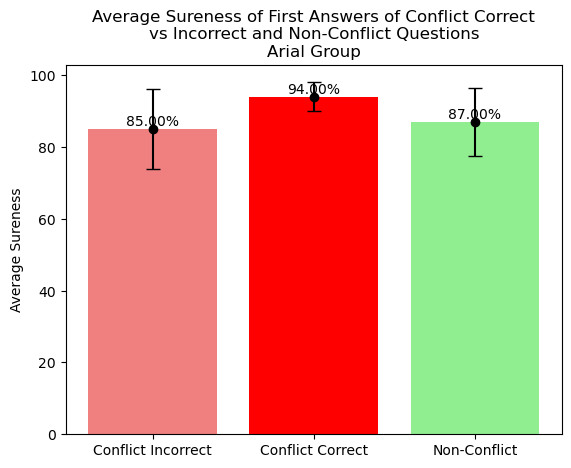

In [48]:
# plotting the sureness of the first answers of the correctly answered conflict questions vs incorrectly answered conflict questions and all non-conflict questions
fig, ax = plt.subplots()
ax.bar(['Conflict Incorrect', 'Conflict Correct', 'Non-Conflict'], [arial_sureness_first_incorrect_conflict, arial_sureness_first_correct_conflict, arial_sureness_first_non_conflict], color=['lightcoral', 'red', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([arial_sureness_first_incorrect_conflict, arial_sureness_first_correct_conflict, arial_sureness_first_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict Incorrect', 'Conflict Correct', 'Non-Conflict'], [arial_sureness_first_incorrect_conflict, arial_sureness_first_correct_conflict, arial_sureness_first_non_conflict], yerr=[arial_se_sureness_first_incorrect_conflict, arial_se_sureness_first_correct_conflict, arial_se_sureness_first_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of First Answers of Conflict Correct\nvs Incorrect and Non-Conflict Questions\nArial Group')
plt.savefig('results/analysis/arial_sureness_first_correct_incorrect_conflict_non_conflict.png')

In [49]:
# Using the F statistic to determine if the difference in sureness between the first answers of the correctly answered conflict questions and incorrectly answered conflict questions is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_sureness_first_correct_conflict / arial_sureness_first_incorrect_conflict if arial_sureness_first_correct_conflict > arial_sureness_first_incorrect_conflict else arial_sureness_first_incorrect_conflict / arial_sureness_first_correct_conflict
# calculating the degrees of freedom
df1 = len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & arial_first_answers_all['is_correct']]) - 1
df2 = len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & ~arial_first_answers_all['is_correct']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.11
The p-value is 0.81
The critical value is 18.51


In [50]:
# Using the F statistic to determine if the difference in sureness between the first answers of the correctly answered conflict questions and all non-conflict questions is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_sureness_first_correct_conflict / arial_sureness_first_non_conflict if arial_sureness_first_correct_conflict > arial_sureness_first_non_conflict else arial_sureness_first_non_conflict / arial_sureness_first_correct_conflict
# calculating the degrees of freedom
df1 = len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & arial_first_answers_all['is_correct']]) - 1
df2 = len(arial_first_answers_all[~arial_first_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.08
The p-value is 0.71
The critical value is 7.71


## Time Analysis

In [51]:
# finding the average time taken to answer the conflict vs non-conflict questions
arial_time_conflict = arial_answers_all[arial_answers_all['is_conflict']]['ans_time'].mean()
arial_se_time_conflict = np.sqrt(arial_answers_all[arial_answers_all['is_conflict']]['ans_time'].var() / len(arial_answers_all[arial_answers_all['is_conflict']]))
arial_time_non_conflict = arial_answers_all[~arial_answers_all['is_conflict']]['ans_time'].mean()
arial_se_time_non_conflict = np.sqrt(arial_answers_all[~arial_answers_all['is_conflict']]['ans_time'].var() / len(arial_answers_all[~arial_answers_all['is_conflict']])
)
print(f'The average time taken to answer the conflict questions is {arial_time_conflict:.2f} with se {arial_se_time_conflict:.2f}')
print(f'The average time taken to answer the non-conflict questions is {arial_time_non_conflict:.2f} with se {arial_se_time_non_conflict:.2f}')

The average time taken to answer the conflict questions is 39.37 with se 9.68
The average time taken to answer the non-conflict questions is 31.48 with se 3.84


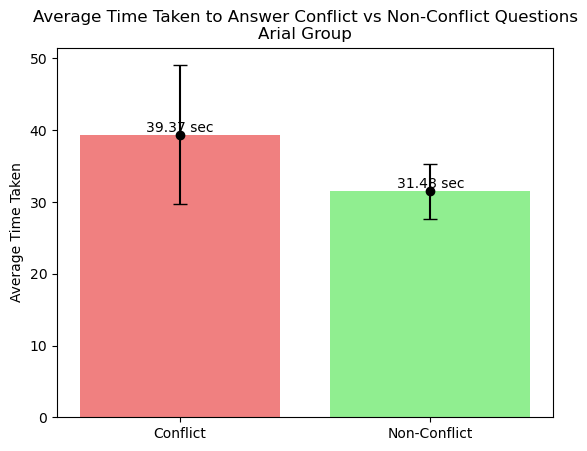

In [52]:
# making a plot of two bars showing the difference in time taken to answer between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [arial_time_conflict, arial_time_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the time taken values on top of the bars
for i, v in enumerate([arial_time_conflict, arial_time_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f} sec', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [arial_time_conflict, arial_time_non_conflict], yerr=[arial_se_time_conflict, arial_se_time_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Time Taken')
ax.set_title('Average Time Taken to Answer Conflict vs Non-Conflict Questions\nArial Group')
plt.savefig('results/analysis/arial_time_conflict_non_conflict.png')

In [53]:
# Using F statistic to determine if the difference in time taken to answer between the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = arial_time_conflict / arial_time_non_conflict if arial_time_conflict > arial_time_non_conflict else arial_time_non_conflict / arial_time_conflict
# calculating the degrees of freedom
df1 = len(arial_answers_all[arial_answers_all['is_conflict']]) - 1
df2 = len(arial_answers_all[~arial_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.25
The p-value is 0.34
The critical value is 1.47


## Mouse Movements Analysis

In [54]:
# finding the average distance to the not chosen answer as a function of conflict
arial_distance_conflict = arial_mouse_movements_all[arial_mouse_movements_all['is_conflict'] & arial_mouse_movements_all['in_decision_area']]['distance_to_not_chosen'].mean()
arial_se_distance_conflict = np.sqrt(arial_mouse_movements_all[arial_mouse_movements_all['is_conflict'] & arial_mouse_movements_all['in_decision_area']]['distance_to_not_chosen'].var() / len(arial_mouse_movements_all[arial_mouse_movements_all['is_conflict'] & arial_mouse_movements_all['in_decision_area']]))
arial_distance_non_conflict = arial_mouse_movements_all[~(arial_mouse_movements_all['is_conflict']) & arial_mouse_movements_all['in_decision_area']]['distance_to_not_chosen'].mean()
arial_se_distance_non_conflict = np.sqrt(arial_mouse_movements_all[~(arial_mouse_movements_all['is_conflict']) & arial_mouse_movements_all['in_decision_area']]['distance_to_not_chosen'].var() / len(arial_mouse_movements_all[~(arial_mouse_movements_all['is_conflict']) & arial_mouse_movements_all['in_decision_area']]))
print(f'The average distance to the not chosen answer of the conflict questions is {arial_distance_conflict:.2f} with se {arial_se_distance_conflict:.2f}')
print(f'The average distance to the not chosen answer of the non-conflict questions is {arial_distance_non_conflict:.2f} with se {arial_se_distance_non_conflict:.2f}')

The average distance to the not chosen answer of the conflict questions is 259.55 with se 0.28
The average distance to the not chosen answer of the non-conflict questions is 264.12 with se 0.30


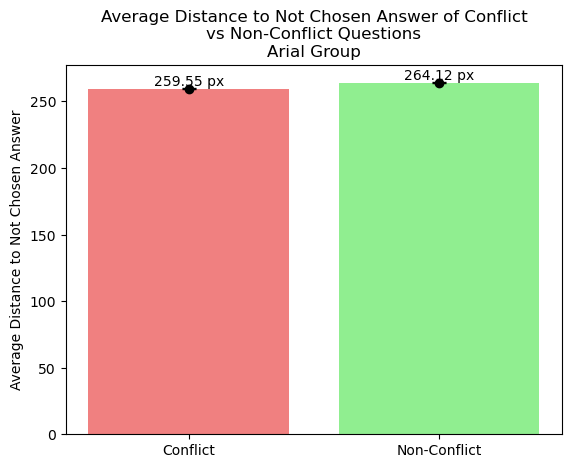

In [55]:
# making a plot of two bars showing the difference in distance to the not chosen answer between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [arial_distance_conflict, arial_distance_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the distance values on top of the bars
for i, v in enumerate([arial_distance_conflict, arial_distance_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f} px', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [arial_distance_conflict, arial_distance_non_conflict], yerr=[arial_se_distance_conflict, arial_se_distance_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Distance to Not Chosen Answer')
ax.set_title('Average Distance to Not Chosen Answer of Conflict\nvs Non-Conflict Questions\nArial Group')
plt.savefig('results/analysis/arial_distance_conflict_non_conflict.png')

In [56]:
# Using F statistic to determine if the difference in distance to the not chosen answer between the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using
# calculating the F statistic
F = arial_distance_conflict / arial_distance_non_conflict if arial_distance_conflict > arial_distance_non_conflict else arial_distance_non_conflict / arial_distance_conflict
# calculating the degrees of freedom
df1 = len(arial_mouse_movements_all[arial_mouse_movements_all['is_conflict'] & arial_mouse_movements_all['in_decision_area']]) - 1
df2 = len(arial_mouse_movements_all[~(arial_mouse_movements_all['is_conflict']) & arial_mouse_movements_all['in_decision_area']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.4f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.02
The p-value is 0.0165
The critical value is 1.01


# Analyzing the results of the Times New Roman group

In [57]:
# repeating the same steps for the Times New Roman group
tnr_group_names = ['maya', '212529697', '318471406', '058368028', 'yarik', 
                   'yura', 'Arseny', 'polly', '327903332', '211629415']

In [58]:
tnr_demographics = [['female', 24, 'army officer', 'CS'], ['female', 24, 'student', 'Law'],
                    ['female', 52, 'nurse', 'Med'], ['male', 21, 'student', 'CS'],
                    ['male', 21, 'student', 'CS'], ['male', 21, 'student', 'ME'],
                    ['female', 21, 'student', 'DS'],['female', 21, 'student', 'DS'],
                    ['female', 18, 'before army'], ['female', 23, 'student', 'DS']]

In [59]:
tnr_group_demographics = pd.DataFrame(tnr_demographics, columns=['gender', 'age', 'work', 'studies'])
tnr_group_demographics['does_study'] = tnr_group_demographics['studies'].notna()
tnr_group_demographics.head()

,gender,age,work,studies,does_study
0,female,24,army officer,CS,True
1,female,24,student,Law,True
2,female,52,nurse,Med,True
3,male,21,student,CS,True
4,male,21,student,CS,True


In [60]:
print('The average age of the Times New Roman group is {:.2f} with se {:.2f}'.format(tnr_group_demographics['age'].mean(), np.sqrt(tnr_group_demographics['age'].var() / len(tnr_group_demographics))))
percentage_study = tnr_group_demographics['does_study'].mean() * 100
print(f"The percentage of people who have a degree (or study) {percentage_study}%")

The average age of the Times New Roman group is 24.60 with se 3.10
The percentage of people who have a degree (or study) 90.0%


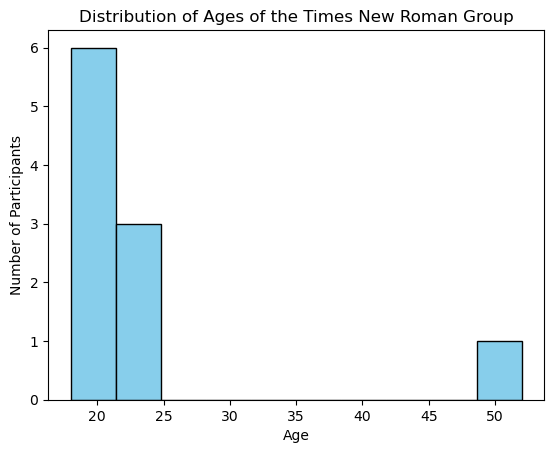

In [61]:
# Making a plot of the distribution of the ages of the Times New Roman group
fig, ax = plt.subplots()
ax.hist(tnr_group_demographics['age'], bins=10, color='skyblue', edgecolor='black')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Participants')
ax.set_title('Distribution of Ages of the Times New Roman Group')
plt.savefig('results/analysis/tnr_age_distribution.png')

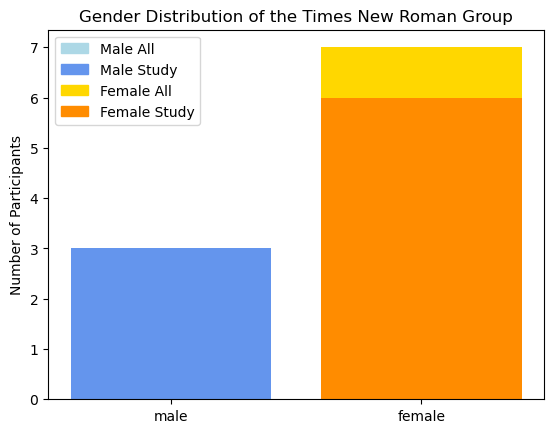

In [62]:
# Making a plot of the distribution of genders of the Times New Roman group
fig, ax = plt.subplots()
ax.bar(['male', 'female'], [len(tnr_group_demographics[tnr_group_demographics['gender'] == 'male']), len(tnr_group_demographics[tnr_group_demographics['gender'] == 'female'])], color=['lightblue', 'gold'])
# adding bars to represent the amount of people who study out of male and female groups
ax.bar(['male', 'female'], [len(tnr_group_demographics[(tnr_group_demographics['gender'] == 'male') & (tnr_group_demographics['does_study'])]), len(tnr_group_demographics[(tnr_group_demographics['gender'] == 'female') & (tnr_group_demographics['does_study'])])], color=['cornflowerblue', 'darkorange'])

colors = {'Male All':'lightblue', 'Male Study':'cornflowerblue', 'Female All':'gold', 'Female Study':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax.set_ylabel('Number of Participants')
ax.set_title('Gender Distribution of the Times New Roman Group')
plt.savefig('results/analysis/tnr_gender_distribution.png')

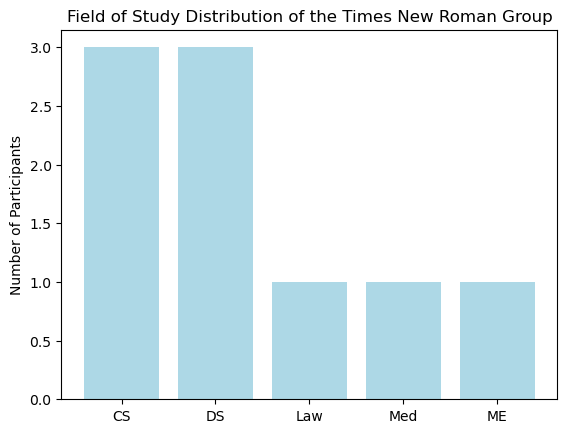

In [63]:
# Making a plot of the distribution of the fields of study of the Times New Roman group
fig, ax = plt.subplots()
ax.bar(tnr_group_demographics['studies'].value_counts().index, tnr_group_demographics['studies'].value_counts().values, color='lightblue')
ax.set_ylabel('Number of Participants')
ax.set_title('Field of Study Distribution of the Times New Roman Group')
plt.savefig('results/analysis/tnr_studies_distribution.png')

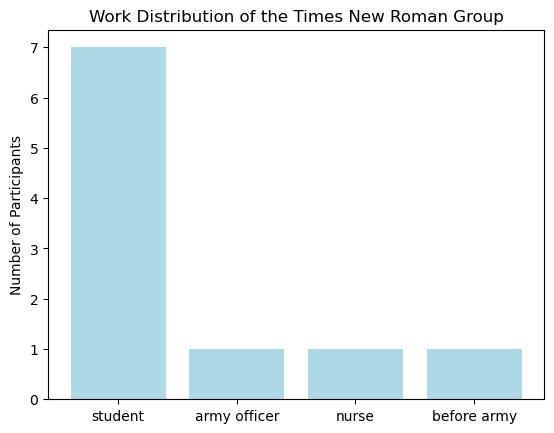

In [64]:
# Making a plot of the distribution of the work of the Times New Roman group
fig, ax = plt.subplots()
ax.bar(tnr_group_demographics['work'].value_counts().index, tnr_group_demographics['work'].value_counts().values, color='lightblue')
ax.set_ylabel('Number of Participants')
ax.set_title('Work Distribution of the Times New Roman Group')
plt.savefig('results/analysis/tnr_work_distribution.png')

In [65]:
# Load the data
tnr_mouse_movements_array = []
tnr_answers_array = []
tnr_first_answers_array = []
for user_id in tnr_group_names:
    # importing mouse movements
    user_mouse_movements = pd.read_csv(f'results/{user_id}/mouse_movements.csv')
    user_mouse_movements = user_mouse_movements.rename(columns={'question': 'question_num'})
    
    # importing answers
    user_answers = pd.read_csv(f'results/{user_id}/answers.csv')
    user_answers['is_correct'] = user_answers['chosen_answer'] == user_answers['correct_answer']
    user_answers['button_clicked'] = user_answers[['opt_a', 'opt_b','chosen_answer']].apply(lambda x: 'A' if x.iloc[0] == x.iloc[2] else 'B' if x.iloc[1] == x.iloc[2] else None, axis=1)
    tnr_first_answers_array.append(user_answers[user_answers['question_num'] == 1])
    
    # merging the two dataframes
    user_mouse_movements = user_mouse_movements.merge(user_answers[['question_num', 'button_clicked', 'is_conflict', 'is_correct']], on='question_num')
    user_mouse_movements['distance_to_chosen'] = user_mouse_movements[['dist_to_ans_a', 'dist_to_ans_b', 'button_clicked']].apply(lambda x: x.iloc[0] if x.iloc[2] == 'A' else x.iloc[1] if x.iloc[2] == 'B' else None, axis=1)
    user_mouse_movements['distance_to_not_chosen'] = user_mouse_movements[['dist_to_ans_a', 'dist_to_ans_b', 'button_clicked']].apply(lambda x: x.iloc[0] if x.iloc[2] == 'B' else x.iloc[1] if x.iloc[2] == 'A' else None, axis=1)
    user_mouse_movements['in_decision_area']=user_mouse_movements['y'].apply(lambda x: 400 < x)
    
    tnr_mouse_movements_array.append(user_mouse_movements)
    tnr_answers_array.append(user_answers)

In [66]:
tnr_mouse_movements_all = pd.concat(tnr_mouse_movements_array)
tnr_mouse_movements_all.head()

,Unnamed: 0,question_num,x,y,dist_to_ans_a,dist_to_ans_b,button_clicked,is_conflict,is_correct,distance_to_chosen,distance_to_not_chosen,in_decision_area
0,0,1,450,550,304.138127,206.155281,A,False,True,304.138127,206.155281,True
1,1,1,326,144,397.129702,481.364727,A,False,True,397.129702,481.364727,False
2,2,1,326,144,397.129702,481.364727,A,False,True,397.129702,481.364727,False
3,3,1,324,138,401.646611,487.155006,A,False,True,401.646611,487.155006,False
4,4,1,324,138,401.646611,487.155006,A,False,True,401.646611,487.155006,False


In [67]:
tnr_answers_all = pd.concat(tnr_answers_array)
tnr_answers_all.head()

,Unnamed: 0,question_num,question,is_conflict,opt_a,opt_b,chosen_answer,correct_answer,sureness,ans_time,is_correct,button_clicked
0,0,1,\n In a study 1000 people were tested. Amon...,False,Sarah likes to watch romantic movies,Sarah likes to watch action movies,Sarah likes to watch romantic movies,Sarah likes to watch romantic movies,100,20.641259,True,A
1,1,2,\nIn a study 1000 people were tested. Among th...,True,Aline likes to watch educational design shows,Aline likes to watch news,Aline likes to watch news,Aline likes to watch news,96,66.097273,True,B
2,2,3,\n In a study 1000 people were tested. Amon...,True,Roni grew up in the city,Roni grew up in the country,Roni grew up in the city,Roni grew up in the city,93,72.769076,True,A
3,3,4,\n In a study 1000 people were tested. Amon...,True,Nick is a university student,Nick has a high school diploma,Nick has a high school diploma,Nick has a high school diploma,80,69.994564,True,B
4,4,5,\n In a study 1000 people were tested. Amon...,True,Rivka is an atheist,Rivka is religious,Rivka is religious,Rivka is an atheist,60,58.974917,False,B


In [68]:
tnr_first_answers_all = pd.concat(tnr_first_answers_array)
tnr_first_answers_all.head()

,Unnamed: 0,question_num,question,is_conflict,opt_a,opt_b,chosen_answer,correct_answer,sureness,ans_time,is_correct,button_clicked
0,0,1,\n In a study 1000 people were tested. Amon...,False,Sarah likes to watch romantic movies,Sarah likes to watch action movies,Sarah likes to watch romantic movies,Sarah likes to watch romantic movies,100,20.641259,True,A
0,0,1,\n In a study 1000 people were tested. Amon...,False,Roni grew up in the country,Roni grew up in the city,Roni grew up in the country,Roni grew up in the country,92,56.108156,True,A
0,0,1,\nIn a study 1000 people were tested. Among th...,True,Etienne drives a used Nissan,Etienne drives a BMW,Etienne drives a used Nissan,Etienne drives a BMW,80,47.839664,False,A
0,0,1,\n In a study 1000 people were tested. Amon...,False,Roni grew up in the city,Roni grew up in the country,Roni grew up in the country,Roni grew up in the country,80,44.630503,True,B
0,0,1,\n In a study 1000 people were tested. Amon...,True,Nick has a high school diploma,Nick is a university student,Nick is a university student,Nick has a high school diploma,95,42.556277,False,B


## Accuracy

In [69]:
# finding the average accuracy of the Times New Roman Group as a whole
tnr_accuracy = tnr_answers_all['is_correct'].mean() * 100
tnr_accuracy_se = np.sqrt(tnr_answers_all['is_correct'].var() / len(tnr_answers_all)) * 100
print(f'The accuracy of the Times New Roman Group is {tnr_accuracy:.2f} questions with se {tnr_accuracy_se:.2f}')

The accuracy of the Times New Roman Group is 72.67 questions with se 3.65


In [70]:
# finding the average accuracy of the Times New Roman Group on conflict vs non-conflict questions as a whole and se
tnr_accuracy_conflict = tnr_answers_all[tnr_answers_all['is_conflict']]['is_correct'].mean() * 100
tnr_accuracy_conflict_se = np.sqrt(tnr_answers_all[tnr_answers_all['is_conflict']]['is_correct'].var() / len(
    tnr_answers_all[tnr_answers_all['is_conflict']])) * 100
tnr_accuracy_non_conflict = tnr_answers_all[~tnr_answers_all['is_conflict']]['is_correct'].mean() * 100
tnr_accuracy_non_conflict_se = np.sqrt(tnr_answers_all[~tnr_answers_all['is_conflict']]['is_correct'].var() / len(
    tnr_answers_all[~tnr_answers_all['is_conflict']])) * 100
print(
    f'The accuracy of the Times New Roman Group on conflict questions is {tnr_accuracy_conflict:.2f} questions with se {tnr_accuracy_conflict_se:.2f}')
print(
    f'The accuracy of the Times New Roman Group on non-conflict questions is {tnr_accuracy_non_conflict:.2f} questions with se {tnr_accuracy_non_conflict_se:.2f}')

The accuracy of the Times New Roman Group on conflict questions is 51.43 questions with se 6.02
The accuracy of the Times New Roman Group on non-conflict questions is 91.25 questions with se 3.18


In [71]:
# finding the average sureness of the correct answers vs incorrect answers
tnr_sureness_correct = tnr_answers_all[tnr_answers_all['is_correct']]['sureness'].mean()
tnr_se_sureness_correct = np.sqrt(tnr_answers_all[tnr_answers_all['is_correct']]['sureness'].var() / len(
    tnr_answers_all[tnr_answers_all['is_correct']]))
tnr_sureness_incorrect = tnr_answers_all[~tnr_answers_all['is_correct']]['sureness'].mean()
tnr_se_sureness_incorrect = np.sqrt(tnr_answers_all[~tnr_answers_all['is_correct']]['sureness'].var() / len(
    tnr_answers_all[~tnr_answers_all['is_correct']])
                                      )
print(
    f'The average sureness of the correct answers is {tnr_sureness_correct:.2f} with se {tnr_se_sureness_correct:.2f}')
print(
    f'The average sureness of the incorrect answers is {tnr_sureness_incorrect:.2f} with se {tnr_se_sureness_incorrect:.2f}')

The average sureness of the correct answers is 86.07 with se 1.93
The average sureness of the incorrect answers is 75.78 with se 3.25


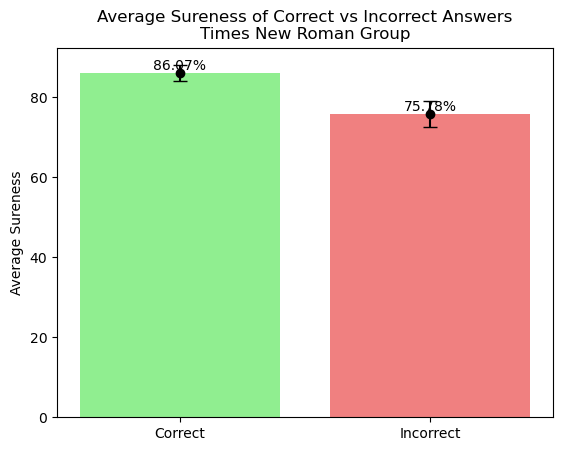

In [72]:
# making a plot of two bars showing the difference in sureness between the correct and incorrect answers
# correct is painted light green, while wrong with light red
# also showing standard deviation as error bars
fig, ax = plt.subplots()
ax.bar(['Correct', 'Incorrect'], [tnr_sureness_correct, tnr_sureness_incorrect], color=['lightgreen', 'lightcoral'])
# printing the sureness values on top of the bars
for i, v in enumerate([tnr_sureness_correct, tnr_sureness_incorrect]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Correct', 'Incorrect'], [tnr_sureness_correct, tnr_sureness_incorrect],
            yerr=[tnr_se_sureness_correct, tnr_se_sureness_incorrect], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Correct vs Incorrect Answers\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_sureness_correct_incorrect.png')

In [73]:
# Using the F statistic to determine if the difference in sureness between the correct and incorrect answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_sureness_correct / tnr_sureness_incorrect if tnr_sureness_correct > tnr_sureness_incorrect else tnr_sureness_incorrect / tnr_sureness_correct
# calculating the degrees of freedom
df1 = len(tnr_answers_all[tnr_answers_all['is_correct']]) - 1
df2 = len(tnr_answers_all[~tnr_answers_all['is_correct']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.14
The p-value is 0.66
The critical value is 1.58


## Response Confidence (Analysis 1)

In [74]:
# finding the average sureness of the conflict vs non-conflict questions
tnr_sureness_conflict = tnr_answers_all[tnr_answers_all['is_conflict']]['sureness'].mean()
tnr_se_sureness_conflict = np.sqrt(tnr_answers_all[tnr_answers_all['is_conflict']]['sureness'].var() / len(
    tnr_answers_all[tnr_answers_all['is_conflict']]))
tnr_sureness_non_conflict = tnr_answers_all[~tnr_answers_all['is_conflict']]['sureness'].mean()
tnr_se_sureness_non_conflict = np.sqrt(tnr_answers_all[~tnr_answers_all['is_conflict']]['sureness'].var() / len(
    tnr_answers_all[~tnr_answers_all['is_conflict']]))
print(
    f'The average sureness of the conflict questions is {tnr_sureness_conflict:.2f} with se {tnr_se_sureness_conflict:.2f}')
print(
    f'The average sureness of the non-conflict questions is {tnr_sureness_non_conflict:.2f} with std {tnr_se_sureness_non_conflict:.2f}')

The average sureness of the conflict questions is 81.84 with se 2.45
The average sureness of the non-conflict questions is 84.50 with std 2.35


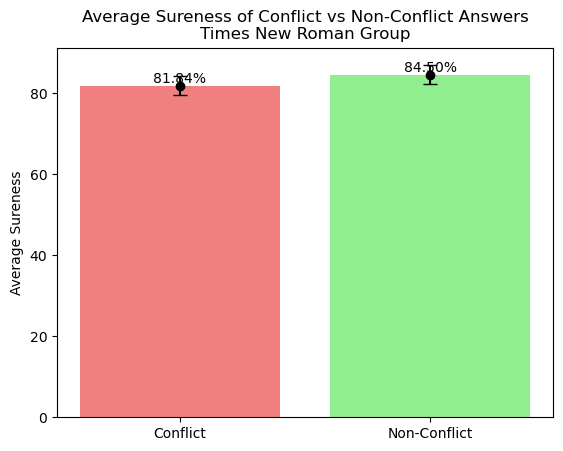

In [75]:
# making a plot of two bars showing the difference in sureness between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
# also showing standard deviation as error bars
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [tnr_sureness_conflict, tnr_sureness_non_conflict],
       color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([tnr_sureness_conflict, tnr_sureness_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [tnr_sureness_conflict, tnr_sureness_non_conflict],
            yerr=[tnr_se_sureness_conflict, tnr_se_sureness_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Conflict vs Non-Conflict Answers\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_sureness_conflict_non_conflict.png')

In [76]:
# Using the F statistic to determine if the difference in sureness between the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using
# calculating the F statistic
F = tnr_sureness_conflict / tnr_sureness_non_conflict if tnr_sureness_conflict > tnr_sureness_non_conflict else tnr_sureness_non_conflict / tnr_sureness_conflict
# calculating the degrees of freedom
df1 = len(tnr_answers_all[tnr_answers_all['is_conflict']]) - 1
df2 = len(tnr_answers_all[~tnr_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.03
The p-value is 0.89
The critical value is 1.47


## Analysis 2

In [77]:
# finding the average sureness of the incorrectly answered conflict vs all non-conflict questions
tnr_sureness_incorrect_conflict = \
tnr_answers_all[tnr_answers_all['is_conflict'] & ~tnr_answers_all['is_correct']]['sureness'].mean()
tnr_se_sureness_incorrect_conflict = np.sqrt(
    tnr_answers_all[tnr_answers_all['is_conflict'] & ~tnr_answers_all['is_correct']]['sureness'].var() / len(
        tnr_answers_all[tnr_answers_all['is_conflict'] & ~tnr_answers_all['is_correct']]))
print(
    f'The average sureness of the incorrectly answered conflict questions is {tnr_sureness_incorrect_conflict:.2f} with se {tnr_se_sureness_incorrect_conflict:.2f}')

The average sureness of the incorrectly answered conflict questions is 80.53 with se 2.67


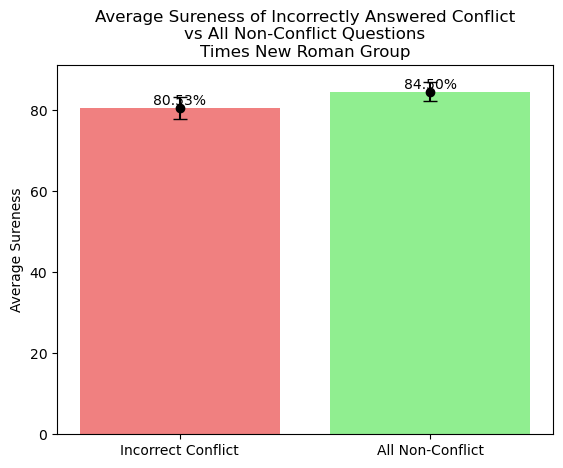

In [78]:
# plotting the sureness of the incorrectly answered conflict questions vs all non-conflict questions
fig, ax = plt.subplots()
ax.bar(['Incorrect Conflict', 'All Non-Conflict'], [tnr_sureness_incorrect_conflict, tnr_sureness_non_conflict],
       color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([tnr_sureness_incorrect_conflict, tnr_sureness_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Incorrect Conflict', 'All Non-Conflict'],
            [tnr_sureness_incorrect_conflict, tnr_sureness_non_conflict],
            yerr=[tnr_se_sureness_incorrect_conflict, tnr_se_sureness_non_conflict], fmt='o', color='black',
            capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of Incorrectly Answered Conflict\nvs All Non-Conflict Questions\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_sureness_incorrect_conflict_all_non_conflict.png')

In [79]:
# Using the F statistic to determine if the difference in sureness between the incorrectly answered conflict and all non-conflict questions is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_sureness_incorrect_conflict / tnr_sureness_non_conflict if tnr_sureness_incorrect_conflict > tnr_sureness_non_conflict else tnr_sureness_non_conflict / tnr_sureness_incorrect_conflict
# calculating the degrees of freedom
df1 = len(tnr_answers_all[tnr_answers_all['is_conflict'] & ~tnr_answers_all['is_correct']]) - 1
df2 = len(tnr_answers_all[~tnr_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.05
The p-value is 0.84
The critical value is 1.58


## Analysis 3

In [80]:
# finding the average sureness of all conflict questions vs non-conflict questions with only correct answers
tnr_sureness_non_conflict_correct = \
tnr_answers_all[~tnr_answers_all['is_conflict'] & tnr_answers_all['is_correct']]['sureness'].mean()
tnr_se_sureness_non_conflict_correct = np.sqrt(
    tnr_answers_all[~tnr_answers_all['is_conflict'] & tnr_answers_all['is_correct']]['sureness'].var() / len(
        tnr_answers_all[~tnr_answers_all['is_conflict'] & tnr_answers_all['is_correct']]))
print(
    f'The average sureness of all non-conflict questions with correct answers is {tnr_sureness_non_conflict_correct:.2f} with se {tnr_se_sureness_non_conflict_correct:.2f}')

The average sureness of all non-conflict questions with correct answers is 87.55 with se 2.06


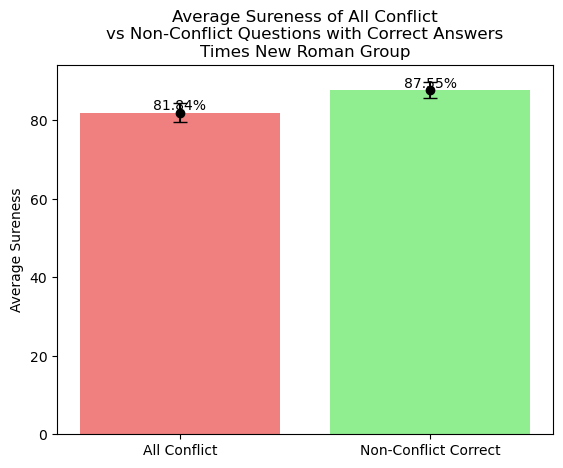

In [81]:
# plotting the sureness of all conflict questions vs non-conflict questions with only correct answers
fig, ax = plt.subplots()
ax.bar(['All Conflict', 'Non-Conflict Correct'], [tnr_sureness_conflict, tnr_sureness_non_conflict_correct],
       color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([tnr_sureness_conflict, tnr_sureness_non_conflict_correct]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['All Conflict', 'Non-Conflict Correct'], [tnr_sureness_conflict, tnr_sureness_non_conflict_correct],
            yerr=[tnr_se_sureness_conflict, tnr_se_sureness_non_conflict_correct], fmt='o', color='black',
            capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of All Conflict\nvs Non-Conflict Questions with Correct Answers\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_sureness_all_conflict_non_conflict_correct.png')

In [82]:
# Using the F statistic to determine if the difference in sureness between the all conflict and non-conflict questions with correct answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_sureness_conflict / tnr_sureness_non_conflict_correct if tnr_sureness_conflict > tnr_sureness_non_conflict_correct else tnr_sureness_non_conflict_correct / tnr_sureness_conflict
# calculating the degrees of freedom
df1 = len(tnr_answers_all[tnr_answers_all['is_conflict']]) - 1
df2 = len(tnr_answers_all[~tnr_answers_all['is_conflict'] & tnr_answers_all['is_correct']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.07
The p-value is 0.78
The critical value is 1.48


## First-answer Analysis (Analysis 4)

In [83]:
# finding the average sureness of the first answers of the Times New Roman Group in conflict vs non-conflict questions
tnr_sureness_first_conflict = tnr_first_answers_all[tnr_first_answers_all['is_conflict']]['sureness'].mean()
tnr_se_sureness_first_conflict = np.sqrt(
    tnr_first_answers_all[tnr_first_answers_all['is_conflict']]['sureness'].var() / len(
        tnr_first_answers_all[tnr_first_answers_all['is_conflict']]))
tnr_sureness_first_non_conflict = tnr_first_answers_all[~tnr_first_answers_all['is_conflict']]['sureness'].mean()
tnr_se_sureness_first_non_conflict = np.sqrt(
    tnr_first_answers_all[~tnr_first_answers_all['is_conflict']]['sureness'].var() / len(
        tnr_first_answers_all[~tnr_first_answers_all['is_conflict']]))
print(
    f'The average sureness of the first answers of the conflict questions is {tnr_sureness_first_conflict:.2f} with se {tnr_se_sureness_first_conflict:.2f}')
print(
    f'The average sureness of the first answers of the non-conflict questions is {tnr_sureness_first_non_conflict:.2f} with se {tnr_se_sureness_first_non_conflict:.2f}')

The average sureness of the first answers of the conflict questions is 80.00 with se 10.14
The average sureness of the first answers of the non-conflict questions is 79.75 with se 11.66


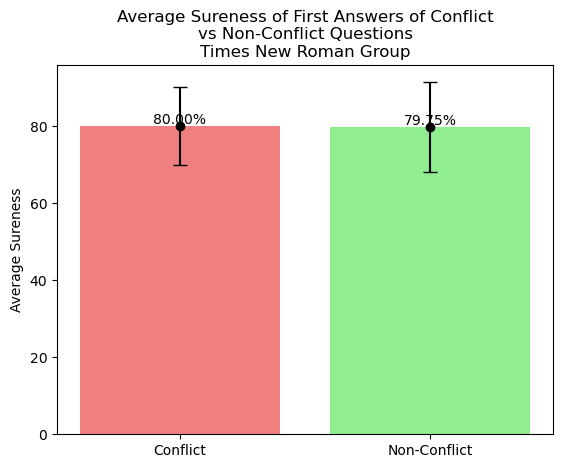

In [84]:
# making a plot of two bars showing the difference in sureness between the first answers of the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [tnr_sureness_first_conflict, tnr_sureness_first_non_conflict],
       color=['lightcoral', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([tnr_sureness_first_conflict, tnr_sureness_first_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [tnr_sureness_first_conflict, tnr_sureness_first_non_conflict],
            yerr=[tnr_se_sureness_first_conflict, tnr_se_sureness_first_non_conflict], fmt='o', color='black',
            capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title('Average Sureness of First Answers of Conflict\nvs Non-Conflict Questions\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_sureness_first_conflict_non_conflict.png')

In [85]:
# Using the F statistic to determine if the difference in sureness between the first answers of the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_sureness_first_conflict / tnr_sureness_first_non_conflict if tnr_sureness_first_conflict > tnr_sureness_first_non_conflict else tnr_sureness_first_non_conflict / tnr_sureness_first_conflict
# calculating the degrees of freedom
df1 = len(tnr_first_answers_all[tnr_first_answers_all['is_conflict']]) - 1
df2 = len(tnr_first_answers_all[~tnr_first_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)
print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.00
The p-value is 0.93
The critical value is 9.01


## Analysis 5

In [86]:
# finding the average sureness of the first answers of the Times New Roman Group in conflict correctly answered, conflict incorrectly answered and all non-conflict questions
tnr_sureness_first_correct_conflict = \
tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & tnr_first_answers_all['is_correct']][
    'sureness'].mean()
tnr_se_sureness_first_correct_conflict = np.sqrt(
    tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & tnr_first_answers_all['is_correct']][
        'sureness'].var() / len(
        tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & tnr_first_answers_all['is_correct']]))
tnr_sureness_first_incorrect_conflict = \
tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & ~tnr_first_answers_all['is_correct']][
    'sureness'].mean()
tnr_se_sureness_first_incorrect_conflict = np.sqrt(
    tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & ~tnr_first_answers_all['is_correct']][
        'sureness'].var() / len(
        tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & ~tnr_first_answers_all['is_correct']]))
print(
    f'The average sureness of the first answers of the correctly answered conflict questions is {tnr_sureness_first_correct_conflict:.2f} with se {tnr_se_sureness_first_correct_conflict:.2f}')
print(
    f'The average sureness of the first answers of the incorrectly answered conflict questions is {tnr_sureness_first_incorrect_conflict:.2f} with se {tnr_se_sureness_first_incorrect_conflict:.2f}')

The average sureness of the first answers of the correctly answered conflict questions is 76.25 with se 15.29
The average sureness of the first answers of the incorrectly answered conflict questions is 87.50 with se 7.50


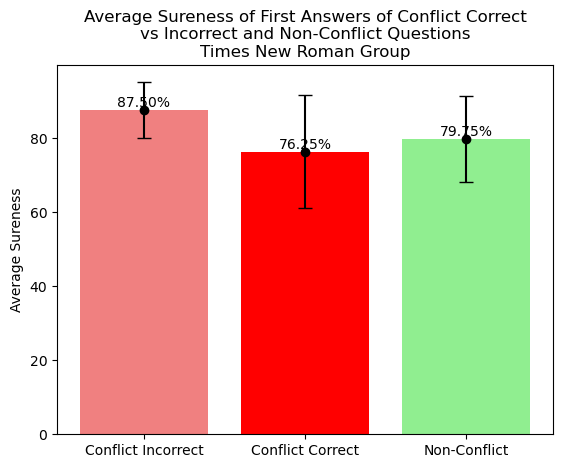

In [87]:
# plotting the sureness of the first answers of the correctly answered conflict questions vs incorrectly answered conflict questions and all non-conflict questions
fig, ax = plt.subplots()
ax.bar(['Conflict Incorrect', 'Conflict Correct', 'Non-Conflict'],
       [tnr_sureness_first_incorrect_conflict, tnr_sureness_first_correct_conflict,
        tnr_sureness_first_non_conflict], color=['lightcoral', 'red', 'lightgreen'])
# printing the sureness values on top of the bars
for i, v in enumerate([tnr_sureness_first_incorrect_conflict, tnr_sureness_first_correct_conflict,
                       tnr_sureness_first_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict Incorrect', 'Conflict Correct', 'Non-Conflict'],
            [tnr_sureness_first_incorrect_conflict, tnr_sureness_first_correct_conflict,
             tnr_sureness_first_non_conflict],
            yerr=[tnr_se_sureness_first_incorrect_conflict, tnr_se_sureness_first_correct_conflict,
                  tnr_se_sureness_first_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Sureness')
ax.set_title(
    'Average Sureness of First Answers of Conflict Correct\nvs Incorrect and Non-Conflict Questions\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_sureness_first_correct_incorrect_conflict_non_conflict.png')

In [88]:
# Using the F statistic to determine if the difference in sureness between the first answers of the correctly answered conflict questions and incorrectly answered conflict questions is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_sureness_first_correct_conflict / tnr_sureness_first_incorrect_conflict if tnr_sureness_first_correct_conflict > tnr_sureness_first_incorrect_conflict else tnr_sureness_first_incorrect_conflict / tnr_sureness_first_correct_conflict
# calculating the degrees of freedom
df1 = len(tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & tnr_first_answers_all['is_correct']]) - 1
df2 = len(tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & ~tnr_first_answers_all['is_correct']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.15
The p-value is 0.84
The critical value is 215.71


In [89]:
# Using the F statistic to determine if the difference in sureness between the first answers of the correctly answered conflict questions and all non-conflict questions is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_sureness_first_correct_conflict / tnr_sureness_first_non_conflict if tnr_sureness_first_correct_conflict > tnr_sureness_first_non_conflict else tnr_sureness_first_non_conflict / tnr_sureness_first_correct_conflict
# calculating the degrees of freedom
df1 = len(tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & tnr_first_answers_all['is_correct']]) - 1
df2 = len(tnr_first_answers_all[~tnr_first_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.05
The p-value is 0.97
The critical value is 9.28


## Time Analysis

In [90]:
# finding the average time taken to answer the conflict vs non-conflict questions
tnr_time_conflict = tnr_answers_all[tnr_answers_all['is_conflict']]['ans_time'].mean()
tnr_se_time_conflict = np.sqrt(tnr_answers_all[tnr_answers_all['is_conflict']]['ans_time'].var() / len(
    tnr_answers_all[tnr_answers_all['is_conflict']]))
tnr_time_non_conflict = tnr_answers_all[~tnr_answers_all['is_conflict']]['ans_time'].mean()
tnr_se_time_non_conflict = np.sqrt(tnr_answers_all[~tnr_answers_all['is_conflict']]['ans_time'].var() / len(
    tnr_answers_all[~tnr_answers_all['is_conflict']])
                                     )
print(
    f'The average time taken to answer the conflict questions is {tnr_time_conflict:.2f} with se {tnr_se_time_conflict:.2f}')
print(
    f'The average time taken to answer the non-conflict questions is {tnr_time_non_conflict:.2f} with se {tnr_se_time_non_conflict:.2f}')

The average time taken to answer the conflict questions is 35.14 with se 2.23
The average time taken to answer the non-conflict questions is 33.03 with se 2.18


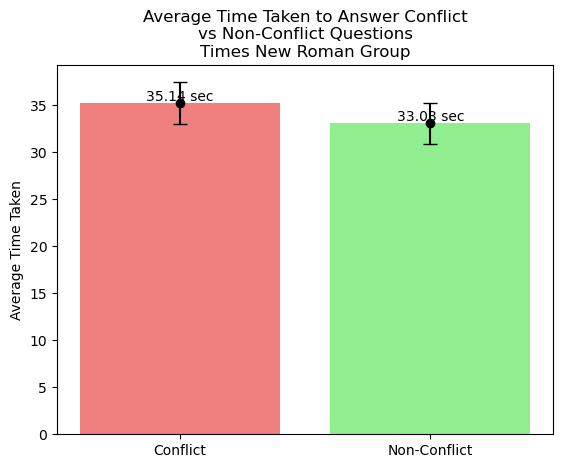

In [91]:
# making a plot of two bars showing the difference in time taken to answer between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [tnr_time_conflict, tnr_time_non_conflict], color=['lightcoral', 'lightgreen'])
# printing the time taken values on top of the bars
for i, v in enumerate([tnr_time_conflict, tnr_time_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f} sec', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [tnr_time_conflict, tnr_time_non_conflict],
            yerr=[tnr_se_time_conflict, tnr_se_time_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Time Taken')
ax.set_title('Average Time Taken to Answer Conflict\nvs Non-Conflict Questions\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_time_conflict_non_conflict.png')

In [92]:
# Using F statistic to determine if the difference in time taken to answer between the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using the F distribution

# calculating the F statistic
F = tnr_time_conflict / tnr_time_non_conflict if tnr_time_conflict > tnr_time_non_conflict else tnr_time_non_conflict / tnr_time_conflict
# calculating the degrees of freedom
df1 = len(tnr_answers_all[tnr_answers_all['is_conflict']]) - 1
df2 = len(tnr_answers_all[~tnr_answers_all['is_conflict']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.06
The p-value is 0.79
The critical value is 1.47


## Mouse Movements Analysis

In [93]:
# finding the average distance to the not chosen answer as a function of conflict
tnr_distance_conflict = \
tnr_mouse_movements_all[tnr_mouse_movements_all['is_conflict'] & tnr_mouse_movements_all['in_decision_area']][
    'distance_to_not_chosen'].mean()
tnr_se_distance_conflict = np.sqrt(
    tnr_mouse_movements_all[tnr_mouse_movements_all['is_conflict'] & tnr_mouse_movements_all['in_decision_area']][
        'distance_to_not_chosen'].var() / len(tnr_mouse_movements_all[
                                                  tnr_mouse_movements_all['is_conflict'] & tnr_mouse_movements_all[
                                                      'in_decision_area']]))
tnr_distance_non_conflict = \
tnr_mouse_movements_all[~(tnr_mouse_movements_all['is_conflict']) & tnr_mouse_movements_all['in_decision_area']][
    'distance_to_not_chosen'].mean()
tnr_se_distance_non_conflict = np.sqrt(tnr_mouse_movements_all[
                                             ~(tnr_mouse_movements_all['is_conflict']) & tnr_mouse_movements_all[
                                                 'in_decision_area']]['distance_to_not_chosen'].var() / len(
    tnr_mouse_movements_all[
        ~(tnr_mouse_movements_all['is_conflict']) & tnr_mouse_movements_all['in_decision_area']]))
print(
    f'The average distance to the not chosen answer of the conflict questions is {tnr_distance_conflict:.2f} with se {tnr_se_distance_conflict:.2f}')
print(
    f'The average distance to the not chosen answer of the non-conflict questions is {tnr_distance_non_conflict:.2f} with se {tnr_se_distance_non_conflict:.2f}')

The average distance to the not chosen answer of the conflict questions is 279.98 with se 0.38
The average distance to the not chosen answer of the non-conflict questions is 261.11 with se 0.31


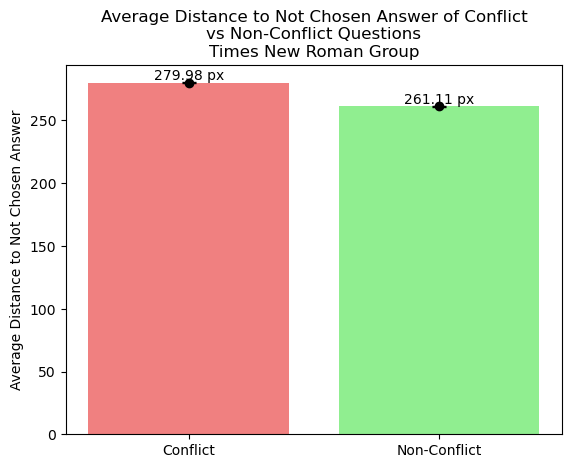

In [94]:
# making a plot of two bars showing the difference in distance to the not chosen answer between the conflict and non-conflict answers
# non-conflict is painted light green, while conflict with light red
fig, ax = plt.subplots()
ax.bar(['Conflict', 'Non-Conflict'], [tnr_distance_conflict, tnr_distance_non_conflict],
       color=['lightcoral', 'lightgreen'])
# printing the distance values on top of the bars
for i, v in enumerate([tnr_distance_conflict, tnr_distance_non_conflict]):
    ax.text(i, v + 0.01, f'{v:.2f} px', ha='center', va='bottom')
# adding error bars
ax.errorbar(['Conflict', 'Non-Conflict'], [tnr_distance_conflict, tnr_distance_non_conflict],
            yerr=[tnr_se_distance_conflict, tnr_se_distance_non_conflict], fmt='o', color='black', capsize=5)

ax.set_ylabel('Average Distance to Not Chosen Answer')
ax.set_title('Average Distance to Not Chosen Answer of Conflict\nvs Non-Conflict Questions\nTimes New Roman Group')
plt.savefig('results/analysis/tnr_distance_conflict_non_conflict.png')

In [95]:
# Using F statistic to determine if the difference in distance to the not chosen answer between the conflict and non-conflict answers is significant
# The null hypothesis is that the two groups have the same mean
# The alternative hypothesis is that the two groups have different means
# The F statistic is calculated as the ratio of the variance of the two groups
# The p-value is calculated using the F distribution
# The degrees of freedom are calculated as the number of samples in each group minus 1
# The p-value is calculated as the probability of observing a value as extreme as the calculated F statistic
# If the p-value is less than the significance level, the null hypothesis is rejected
# The significance level is set to 0.05
# The critical value is calculated using
# calculating the F statistic
F = tnr_distance_conflict / tnr_distance_non_conflict if tnr_distance_conflict > tnr_distance_non_conflict else tnr_distance_non_conflict / tnr_distance_conflict
# calculating the degrees of freedom
df1 = len(tnr_mouse_movements_all[
              tnr_mouse_movements_all['is_conflict'] & tnr_mouse_movements_all['in_decision_area']]) - 1
df2 = len(tnr_mouse_movements_all[
              ~(tnr_mouse_movements_all['is_conflict']) & tnr_mouse_movements_all['in_decision_area']]) - 1
# calculating the p-value
p_value = 1 - 2 * abs(0.5 - stats.f.cdf(F, df1, df2))
# calculating the critical value
critical_value = stats.f.ppf(1 - 0.05, df1, df2)

print(f'The F statistic is {F:.2f}')
print(f'The p-value is {p_value:.4f}')
print(f'The critical value is {critical_value:.2f}')

The F statistic is 1.07
The p-value is 0.0000
The critical value is 1.01


# Overall

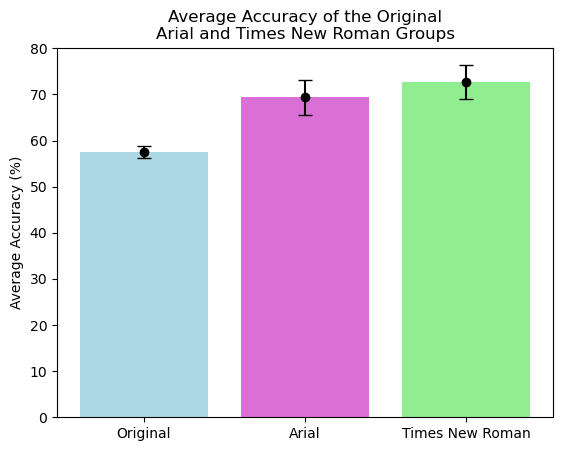

In [99]:
## Plotting the average accuracy of the original, Arial and Times New Roman groups
original_accuracy = 0.575 * 100
original_se = 1.32

plt.bar(['Original', 'Arial', 'Times New Roman'], [original_accuracy, arial_accuracy, tnr_accuracy], color=['lightblue', 'orchid', 'lightgreen'])
plt.errorbar(['Original', 'Arial', 'Times New Roman'], [original_accuracy, arial_accuracy, tnr_accuracy], yerr=[original_se, arial_accuracy_se, tnr_accuracy_se], fmt='o', color='black', capsize=5)
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy of the Original\nArial and Times New Roman Groups')
plt.savefig('results/analysis/average_accuracy_original_arial_tnr.png')

## Comparing statistical significance of differences between the Arial and Times New Roman groups for Accuracy, analysis 1-5 and Time, Mouse Movements

### Accuracy

In [128]:
# Accuracy
# Significance using t statistic with 0.05 significance level

# calculating the t statistic
t = (tnr_accuracy - arial_accuracy) / np.sqrt(arial_accuracy_se ** 2 + tnr_accuracy_se ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all) + len(tnr_answers_all) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.63
The p-value is 0.26
The critical value is 1.65


In [127]:
# Conflict Accuracy

# calculating the t statistic
t = (tnr_accuracy_conflict - arial_accuracy_conflict) / np.sqrt(arial_accuracy_conflict_se ** 2 + tnr_accuracy_conflict_se ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[arial_answers_all['is_conflict']]) + len(tnr_answers_all[tnr_answers_all['is_conflict']]) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.50
The p-value is 0.31
The critical value is 1.66


In [126]:
# Non-Conflict Accuracy

# calculating the t statistic
t = (tnr_accuracy_non_conflict - arial_accuracy_non_conflict) / np.sqrt(arial_accuracy_non_conflict_se ** 2 + tnr_accuracy_non_conflict_se ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[~arial_answers_all['is_conflict']]) + len(tnr_answers_all[~tnr_answers_all['is_conflict']]) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.52
The p-value is 0.30
The critical value is 1.65


### Correctness

In [125]:
# Correct Sureness

# calculating the t statistic
t = (tnr_sureness_correct - arial_sureness_correct) / np.sqrt(arial_se_sureness_correct ** 2 + tnr_se_sureness_correct ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[arial_answers_all['is_correct']]) + len(tnr_answers_all[tnr_answers_all['is_correct']]) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.66
The p-value is 0.25
The critical value is 1.65


In [124]:
# Incorrect Sureness

# calculating the t statistic
t = (tnr_sureness_incorrect - arial_sureness_incorrect) / np.sqrt(arial_se_sureness_incorrect ** 2 + tnr_se_sureness_incorrect ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[~arial_answers_all['is_correct']]) + len(tnr_answers_all[~tnr_answers_all['is_correct']]) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.59
The p-value is 0.28
The critical value is 1.66


### Analysis 1 - Sureness

In [123]:
# Conflict Sureness

# calculating the t statistic
t = (tnr_sureness_conflict - arial_sureness_conflict) / np.sqrt(arial_se_sureness_conflict ** 2 + tnr_se_sureness_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[arial_answers_all['is_conflict']]) + len(tnr_answers_all[tnr_answers_all['is_conflict']]) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.71
The p-value is 0.24
The critical value is 1.66


In [122]:
# Non-Conflict Sureness

# calculating the t statistic
t = (tnr_sureness_non_conflict - arial_sureness_non_conflict) / np.sqrt(arial_se_sureness_non_conflict ** 2 + tnr_se_sureness_non_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[~arial_answers_all['is_conflict']]) + len(tnr_answers_all[~tnr_answers_all['is_conflict']]) - 2
# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.72
The p-value is 0.24
The critical value is 1.65


### Analysis 2

In [121]:
# Conflict Incorrect Sureness

# calculating the t statistic
t = (tnr_sureness_incorrect_conflict - arial_sureness_incorrect_conflict) / np.sqrt(arial_se_sureness_incorrect_conflict ** 2 + tnr_se_sureness_incorrect_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[arial_answers_all['is_conflict'] & ~arial_answers_all['is_correct']]) + len(tnr_answers_all[tnr_answers_all['is_conflict'] & ~tnr_answers_all['is_correct']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 1.66
The p-value is 0.05
The critical value is 1.67


### Analysis 3

In [120]:
# Non-Conflict Correct Sureness

# calculating the t statistic
t = (tnr_sureness_non_conflict_correct - arial_sureness_non_conflict_correct) / np.sqrt(arial_se_sureness_non_conflict_correct ** 2 + tnr_se_sureness_non_conflict_correct ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[~arial_answers_all['is_conflict'] & arial_answers_all['is_correct']]) + len(tnr_answers_all[~tnr_answers_all['is_conflict'] & tnr_answers_all['is_correct']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 1.38
The p-value is 0.08
The critical value is 1.66


### Analysis 4 - First Answer

In [109]:
# Conflict First Answer Sureness

# calculating the t statistic
t = (arial_sureness_first_conflict - tnr_sureness_first_conflict) / np.sqrt(arial_se_sureness_first_conflict ** 2 + tnr_se_sureness_first_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_first_answers_all[arial_first_answers_all['is_conflict']]) + len(tnr_first_answers_all[tnr_first_answers_all['is_conflict']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.71
The p-value is 0.25
The critical value is 1.83


In [110]:
# Non-Conflict First Answer Sureness

# calculating the t statistic
t = (arial_sureness_first_non_conflict - tnr_sureness_first_non_conflict) / np.sqrt(arial_se_sureness_first_non_conflict ** 2 + tnr_se_sureness_first_non_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_first_answers_all[~arial_first_answers_all['is_conflict']]) + len(tnr_first_answers_all[~tnr_first_answers_all['is_conflict']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.48
The p-value is 0.32
The critical value is 1.89


### Analysis 5

In [111]:
# Conflict First Answer Correct Sureness

# calculating the t statistic
t = (arial_sureness_first_correct_conflict - tnr_sureness_first_correct_conflict) / np.sqrt(arial_se_sureness_first_correct_conflict ** 2 + tnr_se_sureness_first_correct_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & arial_first_answers_all['is_correct']]) + len(tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & tnr_first_answers_all['is_correct']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 1.12
The p-value is 0.16
The critical value is 2.13


In [119]:
# Conflict First Answer Incorrect Sureness

# calculating the t statistic
t = (tnr_sureness_first_incorrect_conflict - arial_sureness_first_incorrect_conflict) / np.sqrt(arial_se_sureness_first_incorrect_conflict ** 2 + tnr_se_sureness_first_incorrect_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_first_answers_all[arial_first_answers_all['is_conflict'] & ~arial_first_answers_all['is_correct']]) + len(tnr_first_answers_all[tnr_first_answers_all['is_conflict'] & ~tnr_first_answers_all['is_correct']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.19
The p-value is 0.43
The critical value is 2.35


### Time

In [113]:
# Conflict Time

# calculating the t statistic
t = (arial_time_conflict - tnr_time_conflict) / np.sqrt(arial_se_time_conflict ** 2 + tnr_se_time_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[arial_answers_all['is_conflict']]) + len(tnr_answers_all[tnr_answers_all['is_conflict']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.43
The p-value is 0.34
The critical value is 1.66


In [118]:
# Non-Conflict Time

# calculating the t statistic
t = (tnr_time_non_conflict - arial_time_non_conflict) / np.sqrt(arial_se_time_non_conflict ** 2 + tnr_se_time_non_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_answers_all[~arial_answers_all['is_conflict']]) + len(tnr_answers_all[~tnr_answers_all['is_conflict']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 0.35
The p-value is 0.36
The critical value is 1.65


### Mouse Movements

In [117]:
# Conflict Distance

# calculating the t statistic
t = (tnr_distance_conflict - arial_distance_conflict) / np.sqrt(arial_se_distance_conflict ** 2 + tnr_se_distance_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_mouse_movements_all[arial_mouse_movements_all['is_conflict'] & arial_mouse_movements_all['in_decision_area']]) + len(tnr_mouse_movements_all[tnr_mouse_movements_all['is_conflict'] & tnr_mouse_movements_all['in_decision_area']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 42.77
The p-value is 0.00
The critical value is 1.64


In [116]:
# Non-Conflict Distance

# calculating the t statistic
t = (arial_distance_non_conflict - tnr_distance_non_conflict) / np.sqrt(arial_se_distance_non_conflict ** 2 + tnr_se_distance_non_conflict ** 2)
# calculating the degrees of freedom
df = len(arial_mouse_movements_all[~(arial_mouse_movements_all['is_conflict']) & arial_mouse_movements_all['in_decision_area']]) + len(tnr_mouse_movements_all[~(tnr_mouse_movements_all['is_conflict']) & tnr_mouse_movements_all['in_decision_area']]) - 2

# calculating the p-value
p_value = 1 - stats.t.cdf(t, df)
# calculating the critical value
critical_value = stats.t.ppf(1 - 0.05, df)

print(f'The t statistic is {t:.2f}')
print(f'The p-value is {p_value:.2f}')
print(f'The critical value is {critical_value:.2f}')

The t statistic is 6.91
The p-value is 0.00
The critical value is 1.64
